In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman.sigma_points import MerweScaledSigmaPoints
from filterpy.kalman import JulierSigmaPoints
from filterpy.common import Q_discrete_white_noise
import random

In [3]:
def bbusppg(num):     # Returns B-bus..

    linedata = linedatas(num);
    fb = linedata[:,0];  #first column 
    tb = linedata[:,1];  #2nd column 
    b = linedata[:,4];   #5th column
    nbus = int(np.max([np.max(fb),np.max(tb)]))    # no. of buses...
    nbranch = len(fb);           # no. of branches...
    bbus = np.mat(np.zeros((nbus,nbus)));

    for k in range (0,nbranch):
        bbus[int(fb[k]-1),int(tb[k]-1)] = b[k]
        bbus[int(tb[k]-1),int(fb[k]-1)] = bbus[int(fb[k]-1),int(tb[k]-1)];

    return bbus
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

In [4]:
# Traditional Measurement Data..
# Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6],

def zdatas(i):

        #      |Msnt |Type | Value | From | To | Rii | 
        #---- Voltage Magnitude ------------#
        
        
    Pow_i= Pi[i];  

    zdata14   =  np.mat([[1 , 1  ,  Pow_i[0] , 1 ,   0 ,  9e-4],
             #-----------------------------------#
             #---- Real Power Injection ---------#
             [2 , 2  ,  Pow_i[1] ,  2 ,   0 ,  1e-4],
             [3 , 2 ,  Pow_i[2] ,  3 ,   0 ,  1e-4], 
             [4 , 2 ,  Pow_i[3] , 7 ,   0  , 1e-4],
             [5 , 2 ,  Pow_i[4]   , 8 ,   0  , 1e-4], 
             [6 , 2 ,  Pow_i[5] , 10 ,   0 ,  1e-4],
             [7 , 2 ,  Pow_i[6] , 11 ,   0 ,  1e-4],
             [8 , 2 ,  Pow_i[7], 12 ,   0 ,  1e-4], 
             [9 , 2 ,  Pow_i[8] , 14 ,   0 ,  1e-4],
             #------------------------------------#
             #---- Reative Power Injection -------#
             [10 , 3 ,   Pow_i[9] ,  2 ,   0 ,  1e-4],
             [11 , 3 ,   Pow_i[10] ,  3 ,   0 ,  1e-4], 
             [12 , 3 ,   Pow_i[11] , 7 ,   0  , 1e-4],
             [13 , 3 ,   Pow_i[12],  8 ,   0 ,  1e-4], 
             [14 , 3 ,  Pow_i[13] , 10 ,   0 ,  1e-4],
             [15 , 3 ,  Pow_i[14], 11 ,   0 ,  1e-4],
             [16 , 3 ,  Pow_i[15], 12 ,   0 ,  1e-4], 
             [17 , 3 ,  Pow_i[16], 14 ,   0 ,  1e-4],
             #------------------------------------#
             #------ Real Power Flow ------------- #
             [18 , 4 ,   Pow_i[17] ,  1 ,   2 ,  64e-6],
             [19 , 4 ,   Pow_i[18],  2 ,   3 ,  64e-6],
             [20 , 4 ,  Pow_i[19] ,  4 ,   2 ,  64e-6],
             [21 , 4 ,   Pow_i[20] ,  4 ,   7 ,  64e-6],
             [22 , 4 ,   Pow_i[21] ,  4 ,   9 ,  64e-6],
             [23 , 4 ,  Pow_i[22] ,  5 ,   2 ,  64e-6],
             [24 , 4 ,   Pow_i[23],  5 ,   4 ,  64e-6],
             [25 , 4 ,   Pow_i[24],  5 ,   6 ,  64e-6],
             [26 , 4 ,   Pow_i[25] ,  6 ,  13 ,  64e-6],
             [27 , 4 ,   Pow_i[26] ,  7 ,   9 ,  64e-6],
             [28 , 4 ,  Pow_i[27] , 11 ,   6 ,  64e-6],
             [29 , 4 ,  Pow_i[28] , 12 ,  13 ,  64e-6],
             #------------------------------------#
             #------ Reactive Power Flow -------- #
             [30 , 5 ,  Pow_i[29] ,  1 ,   2 ,  64e-6],
             [31 , 5 ,  Pow_i[30] ,  2 ,   3 ,  64e-6],
             [32 , 5 ,  Pow_i[31] ,  4 ,   2 ,  64e-6],
             [33 , 5 ,  Pow_i[32] ,  4 ,   7 ,  64e-6],
             [34 , 5 ,  Pow_i[33] ,  4 ,  9 ,  64e-6],
             [35 , 5 ,  Pow_i[34] ,  5 ,   2 ,  64e-6],
             [36 , 5 ,  Pow_i[35] ,  5 ,   4 ,  64e-6],
             [37 , 5 ,  Pow_i[36] ,  5 ,   6 ,  64e-6],
             [38 , 5 ,  Pow_i[37] ,  6 ,  13 ,  64e-6],
             [39 , 5 ,  Pow_i[38] ,  7 ,   9 ,  64e-6],
             [40 , 5 ,  Pow_i[39] , 11 ,   6 ,  64e-6],
             [41 , 5 ,  Pow_i[40] , 12 ,  13 ,  64e-6]]);
             #--------------------------------------#


    # Just in case you want to add other systems, add the data above 
    # and change the following condition accordingly
    if num == 3:
        zdt =zdata3;
    elif num==14:
        zdt = zdata14;
    elif num==30:
        zdt = zdata30
        
             
    return zdt

In [5]:
# Line data function

def  linedatas(num):

    # ,    |  From |  To   |   R     |   X     |     B/2  |  X'mer  |
    # ,    |  Bus  | Bus   |  pu     |  pu     |     pu   | TAP (a) |
    linedat14 = np.mat([[1 ,   2 ,  0.01938  , 0.05917  ,  0.0264 ,    1],
                       [1 ,    5 ,  0.05403  , 0.22304  ,  0.0246 ,    1],
                       [2 ,    3 ,  0.04699  , 0.19797  ,  0.0219 ,    1],
                       [2 ,    4 ,  0.05811  , 0.17632  ,  0.0170 ,    1],
                       [2 ,    5 ,  0.05695  , 0.17388  ,  0.0173 ,    1],
                       [3 ,    4 ,  0.06701  , 0.17103  ,  0.0064 ,    1],
                       [4 ,    5 ,  0.01335  , 0.04211  ,  0.0    ,    1],
                       [4 ,    7 ,  0.0      , 0.20912  ,  0.0 ,   0.978],
                       [4 ,    9 ,  0.0      , 0.55618  ,  0.0 ,   0.969],
                       [5 ,    6 ,  0.0      , 0.25202  ,  0.0 ,   0.932],
                       [6 ,    11,  0.09498  , 0.19890  ,  0.0 ,       1],
                       [6 ,    12,  0.12291  , 0.25581  ,  0.0 ,       1],
                       [6 ,    13,  0.06615  , 0.13027  ,  0.0 ,       1],
                       [7 ,    8 ,  0.0      , 0.17615  ,  0.0 ,       1],
                       [7 ,    9 ,  0.0      , 0.11001  ,  0.0 ,       1],
                       [9 ,    10,  0.03181  , 0.08450  ,  0.0 ,       1],
                       [9 ,    14,  0.12711  , 0.27038  ,  0.0 ,       1],
                       [10 ,   11,  0.08205  , 0.19207  ,  0.0 ,       1],
                       [12 ,   13,  0.22092  , 0.19988  ,  0.0 ,       1],
                       [13 ,   14,  0.17093  , 0.34802  ,  0.0 ,       1]]);


    if num == 3:
        linedt = linedat3;
    elif num==14: 
        linedt = linedat14;
    elif num==30:
        linedt = linedat30;
        
             
    return linedt

In [6]:
# Returns ybus
def ybusppg(num):  

    linedata = linedatas(num); # Calling "linedata6.m" for Line Data...
    fb = linedata[:,0];     # From bus number... i.e in the column 1
    tb = linedata[:,1];     # To bus number...
    r = linedata[:,2];      # Resistance, R...
    x = linedata[:,3];      # Reactance, X...
    b = linedata[:,4];      # Ground Admittance, B/2...
    a = linedata[:,5];      # Tap setting value..
    z = r + x*1j;            # Z matrix...
    y = 1/z;               # To get inverse of each element...
    b = b*1j;                # Make B imaginary...

    nbus = int(np.max([np.max(fb),np.max(tb)]));    # no. of buses...(14 in this case)
    nbranch = len(fb) # no. of branches...(= 20)
    ybus = np.mat(np.zeros((nbus,nbus), dtype=complex));       # Initialise YBus...
    
    # Formation of the Off Diagonal Elements...
    for k in range (0,nbranch):
        ybus[int(fb[k]-1),int(tb[k]-1)] =ybus[int(fb[k]-1),int(tb[k]-1)]- (y[k]/a[k]);
        ybus[int(tb[k]-1),int(fb[k]-1)] = ybus[int(fb[k]-1),int(tb[k]-1)];
 
 
    # Formation of Diagonal Elements....
    for m in range (0,nbus):
        for n in range (0,nbranch):
            if fb[n]-1 == m:
                ybus[m,m]=ybus[m,m]+ (y[n]/(a[n]**2)) + b[n]
            elif tb[n]-1 ==m:
                ybus[m,m]=ybus[m,m]+y[n]
                

    return ybus

In [7]:

# here we get the 27*41 matrix
def HJacobian_at1(x):
    num=14;
    del_T=0.001;
    ybus = ybusppg(num); # Get YBus..
    zdata = zdatas(1); # Get Measurement data..
    
    #in every iteration we take a new row to consider from the csv file we imported
    V=x[13:]
    del1 = np.zeros(num);
    del1[1:]=x[0:13]
    
    bpq = bbusppg(num); # Get B data..
    nbus = int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
    type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
#     z = zdata[:,2]; # Measuement values..
    fbus = zdata[:,3]; # From bus..
    tbus = zdata[:,4]; # To bus..
    Ri = np.diagflat(zdata[:,5]) # Measurement Error..
   
    G = ybus.real;
    B = ybus.imag 
    E = np.matrix(np.concatenate((del1[1:], V)))# E is the state matrix of 27*1

    vi = np.mat((type1 == 1).nonzero())[0,:]; # Index of measurements..
    ppi = np.mat((type1 == 2).nonzero())[0,:];
    qi = np.mat((type1 == 3).nonzero())[0,:]
    pf = np.mat((type1 == 4).nonzero())[0,:]
    qf = np.mat((type1 == 5).nonzero())[0,:]

    nvi = vi.shape[1]; # Number of Voltage measurements..
    npi = ppi.shape[1]; # Number of Real Power Injection measurements..
    nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
    npf = pf.shape[1]; # Number of Real Power Flow measurements..
    nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..
    H11=np.mat(np.zeros((nvi,nbus-1)))

    H12=np.mat(np.zeros((nvi,nbus)))
    for k in range(0,nvi):
        for n in range(0,nvi):
            if n == k:
                 H12[k,n]=1

    H21=np.mat(np.zeros((npi,nbus-1)))
    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                    H21[i,k] += V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
                H21[i,k] -= (V[m]**2)*B[m,m]
            else:
                H21[i,k]=V[m]*V[k+1]*(G[m,k+1]*np.sin(del1[m]-del1[k+1]) - B[m,k+1]*np.cos(del1[m]-del1[k+1]))

    H22=np.mat(np.zeros((npi,nbus)))
    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                    H22[i,k] += V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H22[i,k] += V[m]*G[m,m]
            else:
                H22[i,k]=V[m]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))

    H31=np.mat(np.zeros((nqi,nbus-1)))
    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                for n in range(0,nbus):
                     H31[i,k] += V[m]*V[n]*(G[m,n]*np.cos(del1[m]-del1[n]) + B[m,n]*np.sin(del1[m]-del1[n]))
                H31[i,k] -= (V[m]**2)*G[m,m]
            else:
                H31[i,k]=V[m]*V[k+1]*(-G[m,k+1]*np.cos(del1[m]-del1[k+1]) - B[m,k+1]*np.sin(del1[m]-del1[k+1]))

    H32=np.mat(np.zeros((nqi,nbus)))
    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                for n in range(0,nbus):
                     H32[i,k] += V[n]*(G[m,n]*np.sin(del1[m]-del1[n]) - B[m,n]*np.cos(del1[m]-del1[n]))
                H32[i,k] -= V[m]*B[m,m]
            else:
                H32[i,k]=V[m]*(G[m,k]*np.sin(del1[m]-del1[k]) - B[m,k]*np.cos(del1[m]-del1[k]))

    H41=np.mat(np.zeros((npf,nbus-1)))
    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                H41[i,k] = V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            elif k+1 == n:
                H41[i,k] = -V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H41[i,k] = 0

    H42=np.mat(np.zeros((npf,nbus)))
    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H42[i,k] = -V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n])) -2*G[m,n]*V[m]
            elif k == n:
                H42[i,k] = -V[m]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H42[i,k] = 0

    H51=np.mat(np.zeros((nqf,nbus-1)))
    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        for k in range(0,nbus-1):
            if k+1 == m:
                 H51[i,k] = -V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            elif k+1 == n:
                H51[i,k] = V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))
            else:
                H51[i,k] = 0

    H52=np.mat(np.zeros((nqf,nbus)))
    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        for k in range(0,nbus):
            if k == m:
                H52[i,k] = -V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n])) -2*V[m]*(-B[m,n]+bpq[m,n])
            elif k == n:
                H52[i,k] = -V[m]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))
            else:
                H52[i,k] = 0

    H1=np.mat(np.concatenate((H11,H12),axis=1))
    H2=np.mat(np.concatenate((H21,H22),axis=1))
    H3=np.mat(np.concatenate((H31,H32),axis=1))
    H4=np.mat(np.concatenate((H41,H42),axis=1))
    H5=np.mat(np.concatenate((H51,H52),axis=1))

    H=np.mat(np.concatenate((H1,H2,H3,H4,H5)))
    return H
    

In [8]:
def Hx(x):

    num=14;
    del_T=0.001;
    ybus = ybusppg(num); # Get YBus..
    zdata = zdatas(1); # Get Measurement data..
    
    #in every iteration we take a new row to consider from the csv file we imported

    V=x[13:]
    del1 = np.zeros(num);
    del1[1:]=x[0:13]
    bpq = bbusppg(num); # Get B data..
    nbus = int(np.max([np.max(zdata[:,3]),np.max(zdata[:,4])])); # Get number of buses..
    type1 = zdata[:,1]; # Type of measurement, Vi - 1, Pi - 2, Qi - 3, Pij - 4, Qij - 5, Iij - 6..
    z = zdata[:,2]; # Measuement values..
    fbus = zdata[:,3]; # From bus..
    tbus = zdata[:,4]; # To bus..
    Ri = np.diagflat(zdata[:,5]) # Measurement Error..
   
    G = ybus.real;
    B = ybus.imag 
    E = np.matrix(np.concatenate((del1[1:], V)))# E is the state matrix of 27*1

    vi = np.mat((type1 == 1).nonzero())[0,:]; # Index of measurements..
    ppi = np.mat((type1 == 2).nonzero())[0,:];
    qi = np.mat((type1 == 3).nonzero())[0,:]
    pf = np.mat((type1 == 4).nonzero())[0,:]
    qf = np.mat((type1 == 5).nonzero())[0,:]

    nvi = vi.shape[1]; # Number of Voltage measurements..
    npi = ppi.shape[1]; # Number of Real Power Injection measurements..
    nqi = qi.shape[1]; # Number of Reactive Power Injection measurements..
    npf = pf.shape[1]; # Number of Real Power Flow measurements..
    nqf = qf.shape[1]; # Number of Reactive Power Flow measurements..

    h1 = np.mat(V[int(fbus[vi])-1]);
    h2 = np.mat(np.zeros((npi,1)));
    h3 = np.mat(np.zeros((nqi,1)));
    h4 = np.mat(np.zeros((npf,1)));
    h5 = np.mat(np.zeros(((nqf,1))));
    

    for i in range(0,npi):
        m = int(fbus[(ppi[0,i])])-1
        for k in range(0,nbus):
            h2[i] += V[m]*V[k]*(G[m,k]*np.cos(del1[m]-del1[k]) + B[m,k]*np.sin(del1[m]-del1[k]))

    for i in range(0,nqi):
        m = int(fbus[(qi[0,i])])-1
        for k in range(0,nbus):
            h3[i] += V[m]*V[k]*((G[m,k]*np.sin(del1[m]-del1[k])) - (B[m,k]*np.cos(del1[m]-del1[k])))

    for i in range(0,npf):
        m = int(fbus[(pf[0,i])])-1
        n = int(tbus[(pf[0,i])])-1
        h4[i] = -(V[m]**2)*G[m,n] - V[m]*V[n]*(-G[m,n]*np.cos(del1[m]-del1[n]) - B[m,n]*np.sin(del1[m]-del1[n]))

    for i in range(0,nqf):
        m = int(fbus[(qf[0,i])])-1
        n = int(tbus[(qf[0,i])])-1
        h5[i] = -(V[m]**2)*(-B[m,n]+bpq[m,n]) - V[m]*V[n]*(-G[m,n]*np.sin(del1[m]-del1[n]) + B[m,n]*np.cos(del1[m]-del1[n]))

    h111=np.mat(np.concatenate((h1,h2,h3,h4,h5)))
    h= np.zeros(41)
    for i1 in range (41):
        h[i1]=h111[i1]
    return h

 repetition ------------->>>>>>>>>>>>>>>>> 0
state 

 [1.02840087 1.01311481 0.97381745 0.98525269 0.98264396 1.01783308
 1.00245914 1.03860792 0.99505866 0.98023175 0.98801672 0.99674603
 1.00175378 0.97312719]


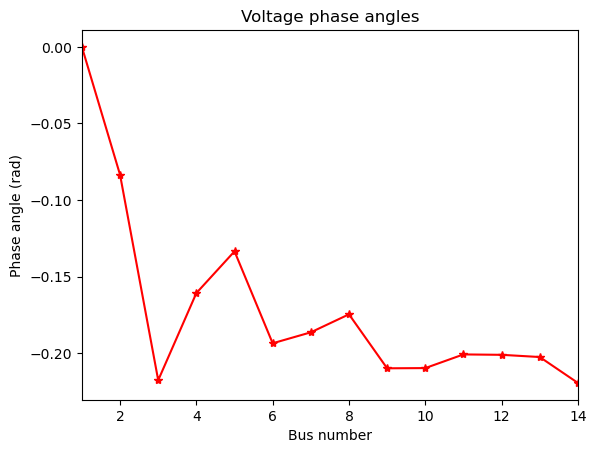

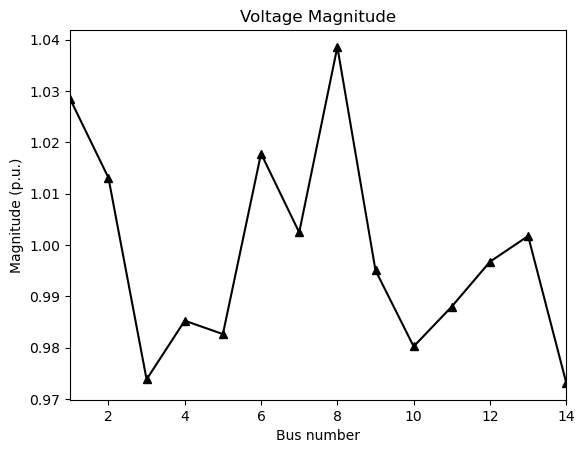

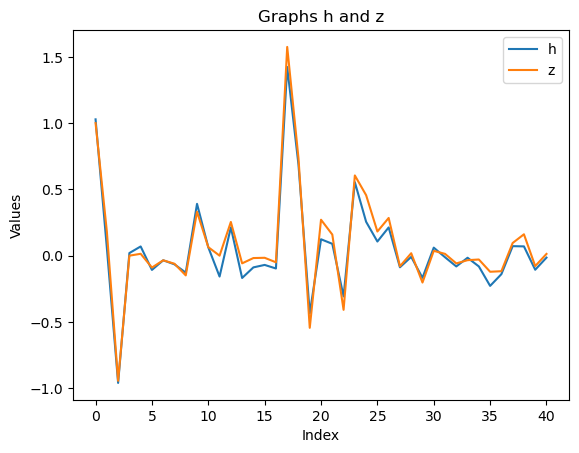

 repetition ------------->>>>>>>>>>>>>>>>> 1
state 

 [1.04830667 1.03281435 0.99653814 1.00911559 1.00823989 1.04014588
 1.02735357 1.06248584 1.01271881 1.00341032 1.01313918 1.02009883
 1.01954731 0.99238157]


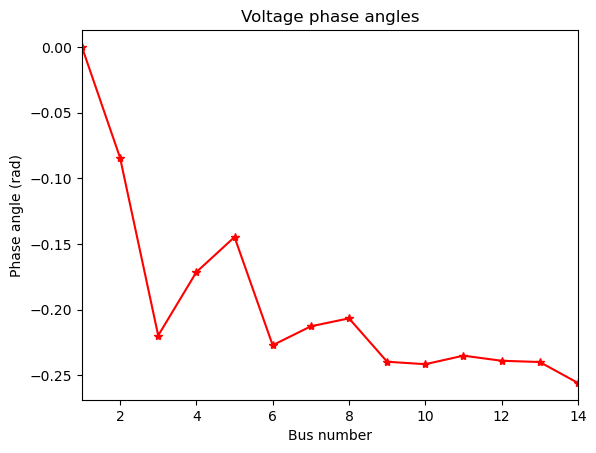

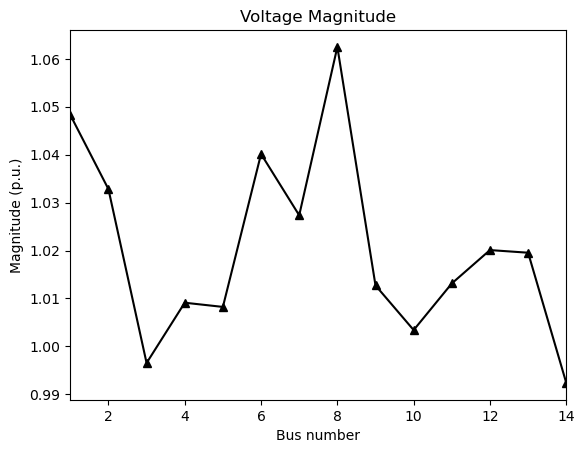

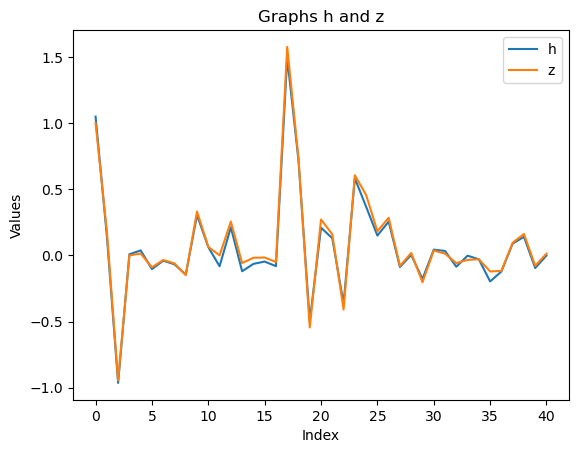

 repetition ------------->>>>>>>>>>>>>>>>> 2
state 

 [1.05308573 1.0378083  1.00214292 1.01471457 1.01418482 1.04731013
 1.03410042 1.07005533 1.01949868 1.0110974  1.02135509 1.02810868
 1.02679324 0.99978224]


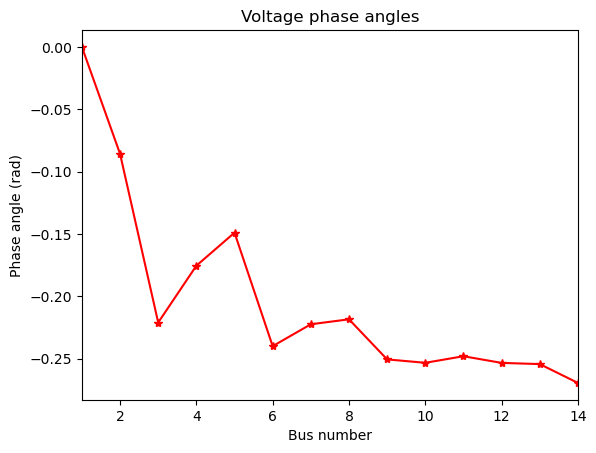

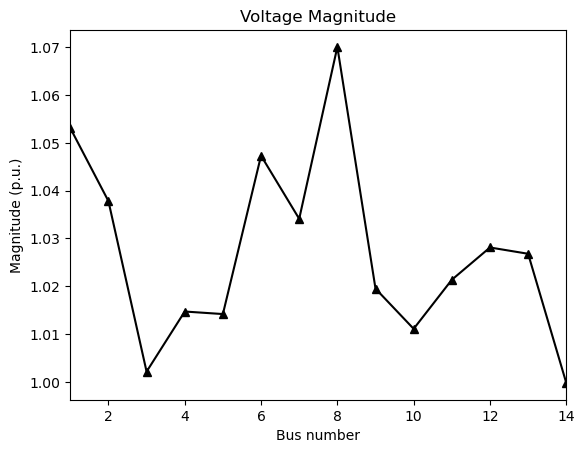

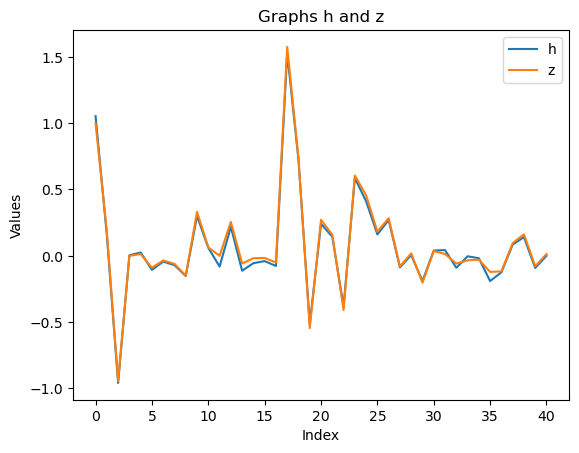

 repetition ------------->>>>>>>>>>>>>>>>> 3
state 

 [1.0539062  1.03874938 1.00334835 1.01603581 1.01550869 1.04984203
 1.0362422  1.07257512 1.02181709 1.0136487  1.02409436 1.03097688
 1.02949915 1.00247104]


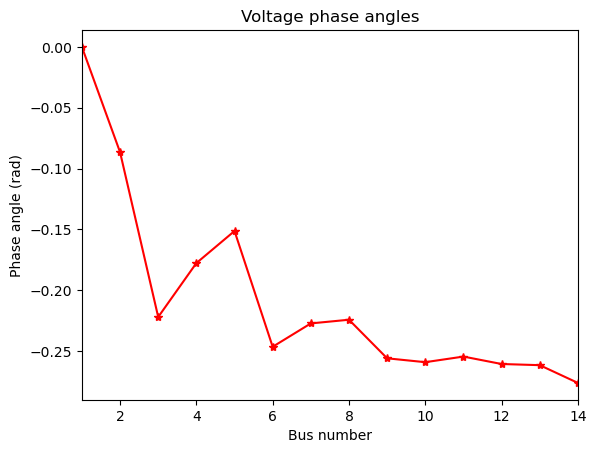

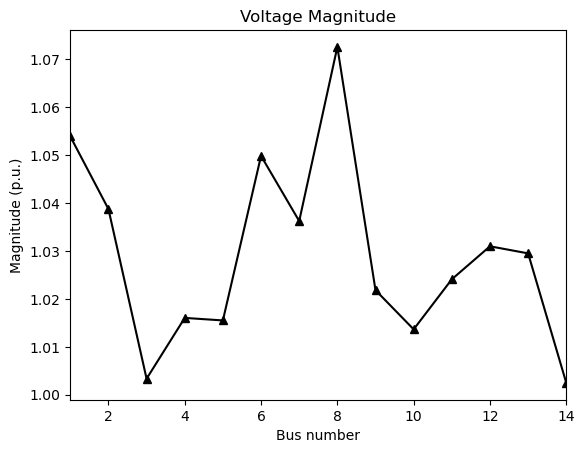

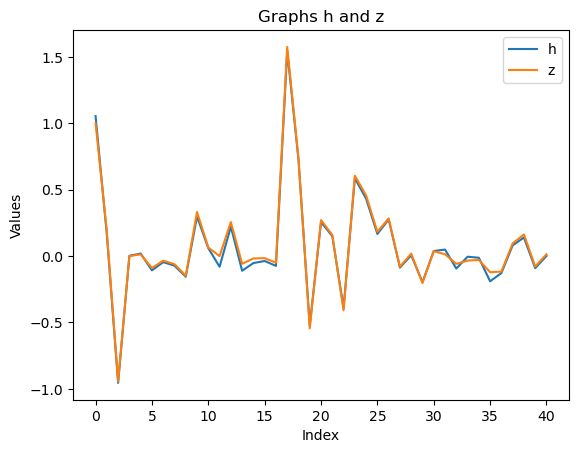

 repetition ------------->>>>>>>>>>>>>>>>> 4
state 

 [1.05346027 1.03836659 1.00309104 1.01589015 1.01534834 1.05050673
 1.03661967 1.07321922 1.02232019 1.0142439  1.0247964  1.03182239
 1.03030015 1.00320925]


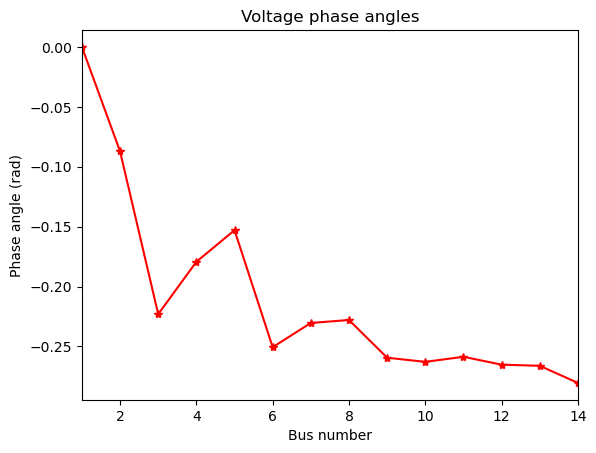

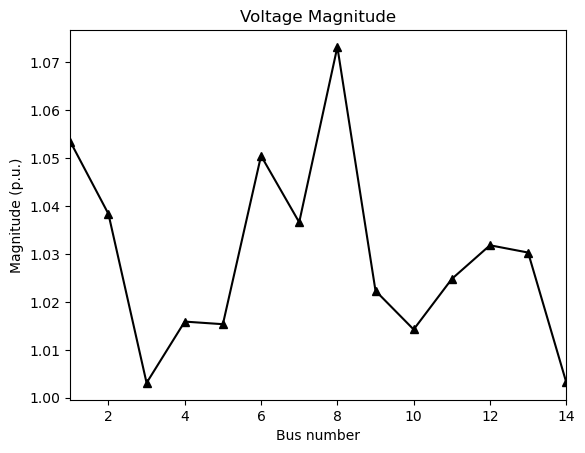

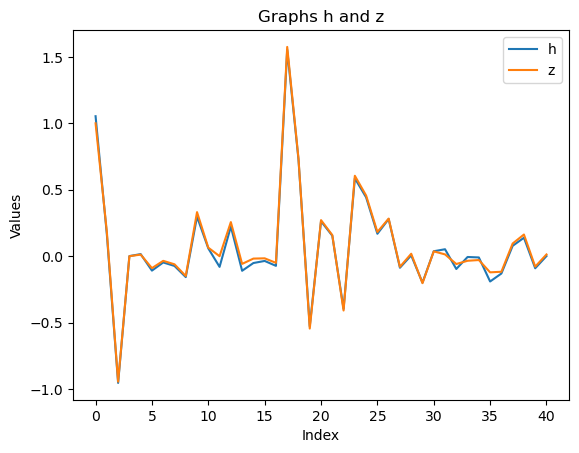

 repetition ------------->>>>>>>>>>>>>>>>> 5
state 

 [1.05257476 1.0375114  1.00228917 1.01517106 1.01462084 1.0503171
 1.03623296 1.07304412 1.02199118 1.01396939 1.02460132 1.03173498
 1.0301908  1.00303161]


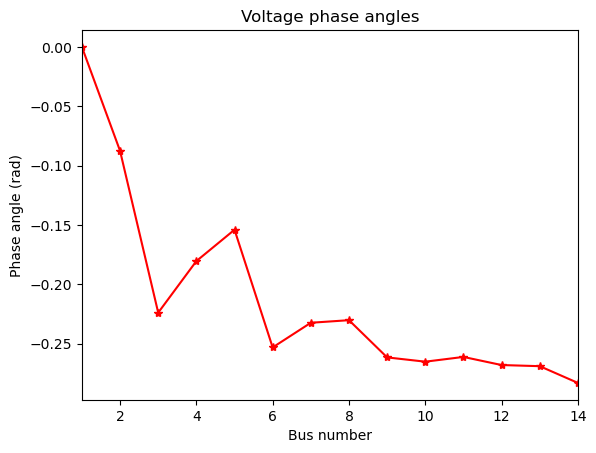

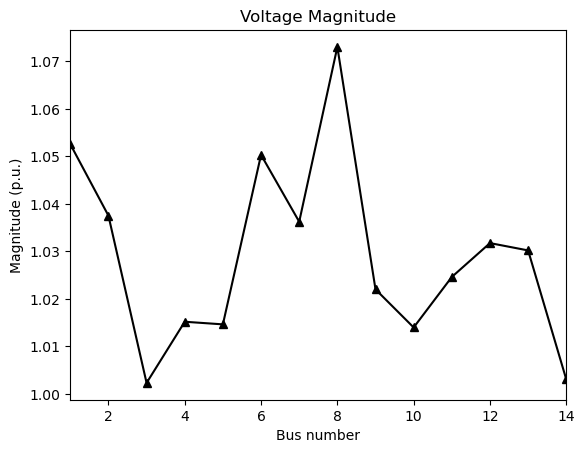

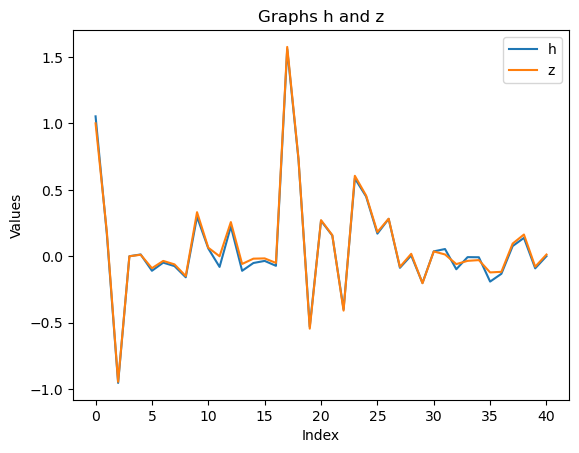

 repetition ------------->>>>>>>>>>>>>>>>> 6
state 

 [1.05154481 1.03649184 1.00128464 1.01422191 1.01367083 1.04970761
 1.03549638 1.07248578 1.0212641  1.01328131 1.02397552 1.03118166
 1.02961899 1.00240002]


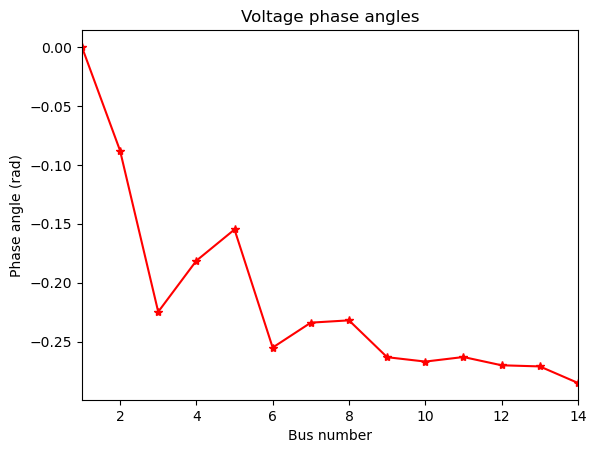

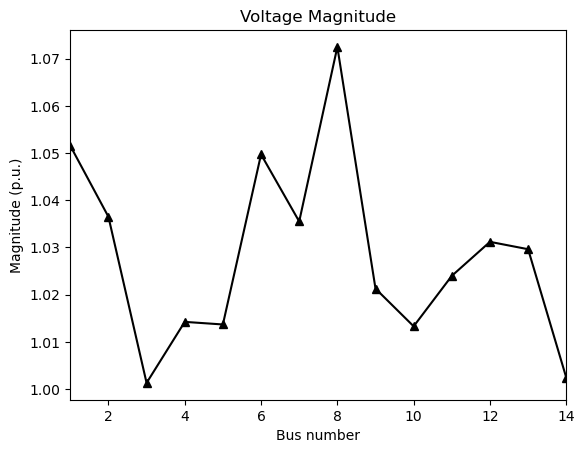

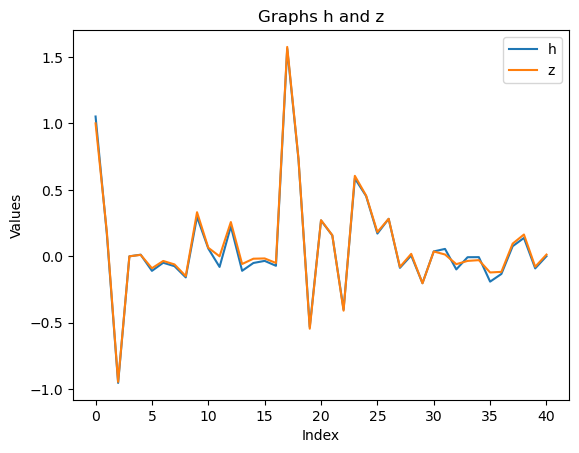

 repetition ------------->>>>>>>>>>>>>>>>> 7
state 

 [1.0504795  1.03542672 1.00021383 1.01318716 1.01263988 1.04889125
 1.03460114 1.07174682 1.02034838 1.01239662 1.02314093 1.03039319
 1.02881124 1.00154204]


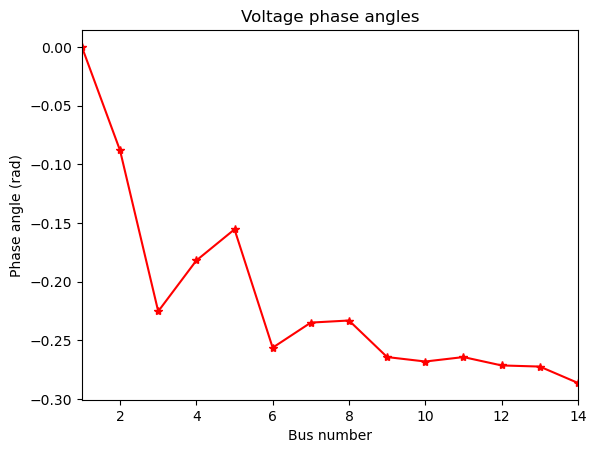

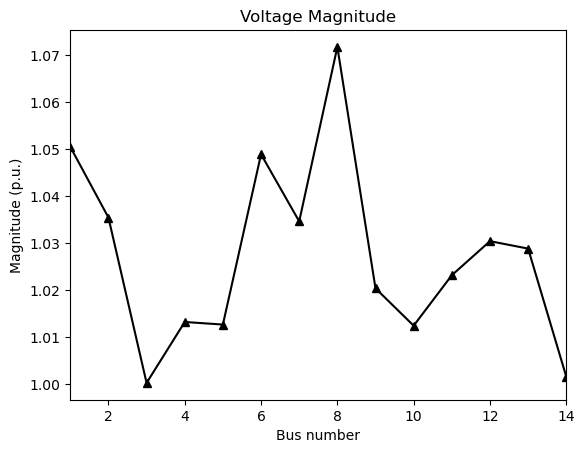

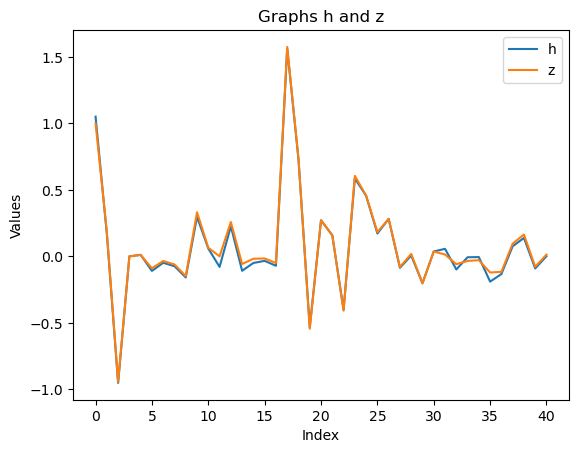

 repetition ------------->>>>>>>>>>>>>>>>> 8
state 

 [1.04942797 1.03436959 0.99914012 1.01213631 1.01159599 1.04798126
 1.03364502 1.07093185 1.01935361 1.01142791 1.02221358 1.02949421
 1.02789224 1.00058152]


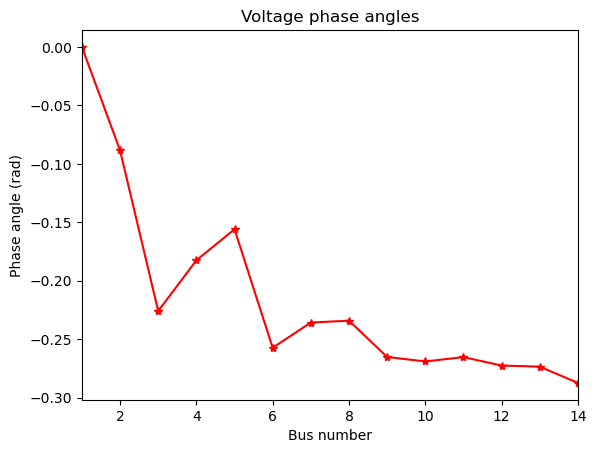

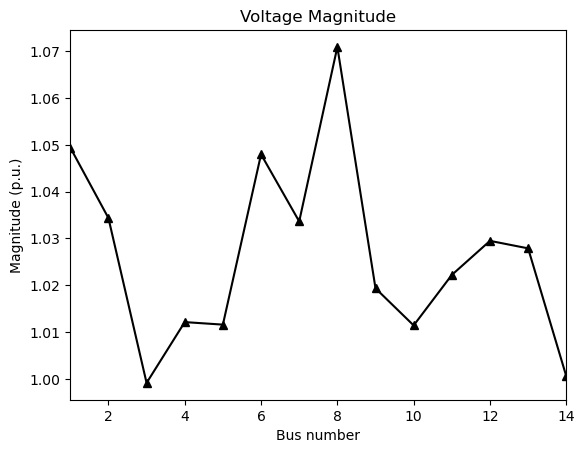

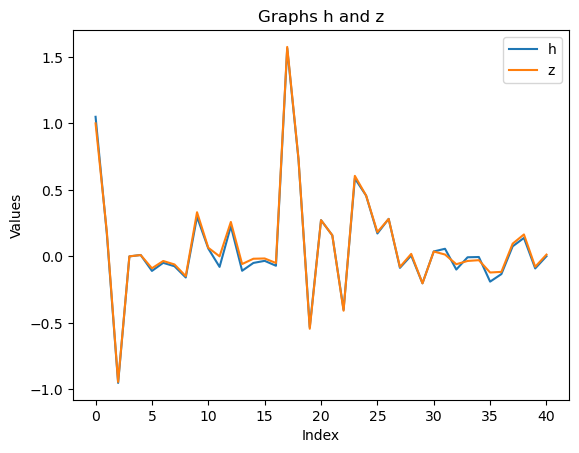

 repetition ------------->>>>>>>>>>>>>>>>> 9
state 

 [1.04841175 1.03334441 0.99809266 1.01110345 1.01057179 1.04704172
 1.03267939 1.07009493 1.01834008 1.01043732 1.02125816 1.02855566
 1.0269332  0.99958812]


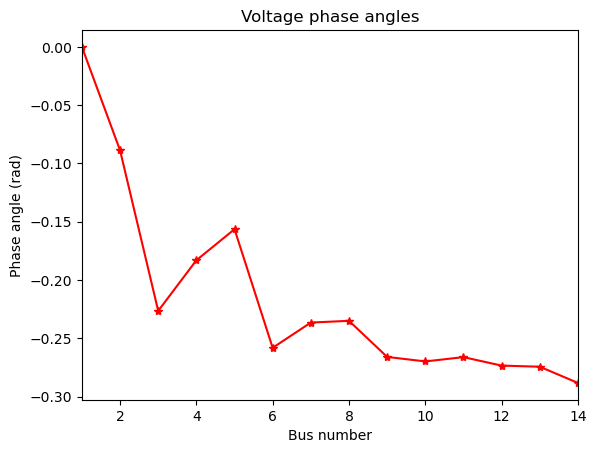

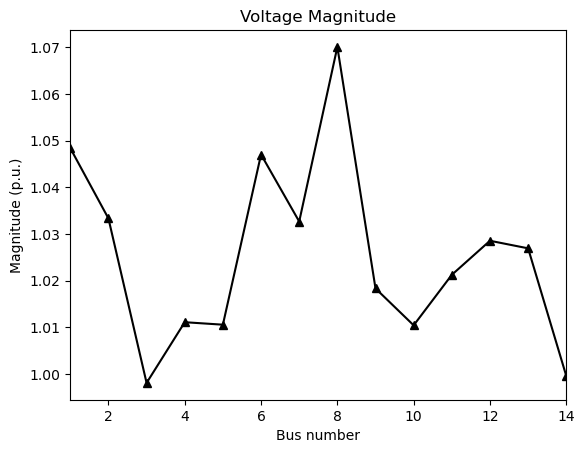

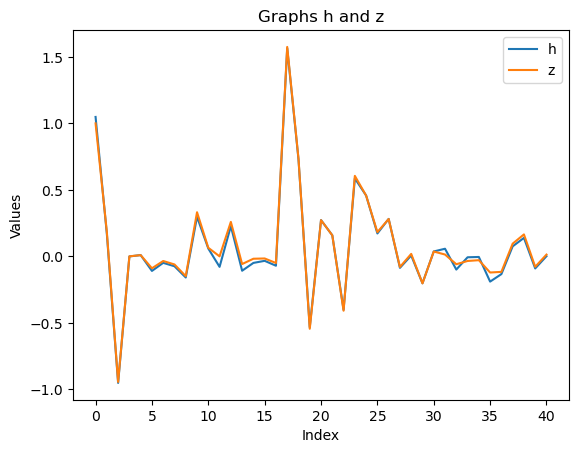

 repetition ------------->>>>>>>>>>>>>>>>> 10
state 

 [1.04744105 1.03236311 0.9970868  1.01010688 1.00958504 1.04610756
 1.03173319 1.06926796 1.01734179 1.00945918 1.02031006 1.02761676
 1.02597421 0.99859999]


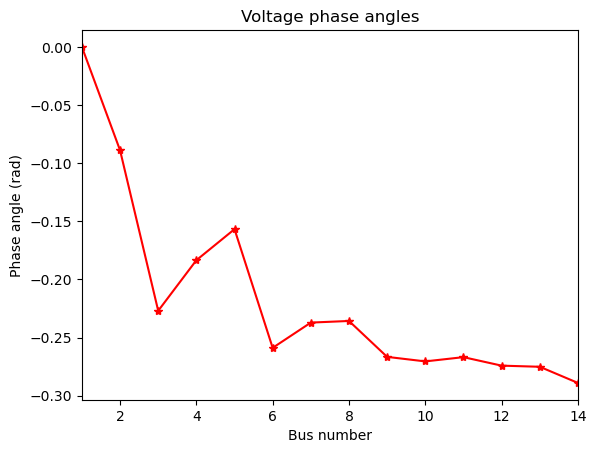

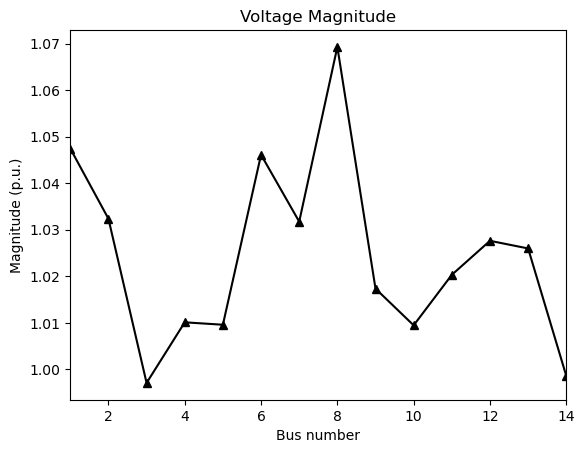

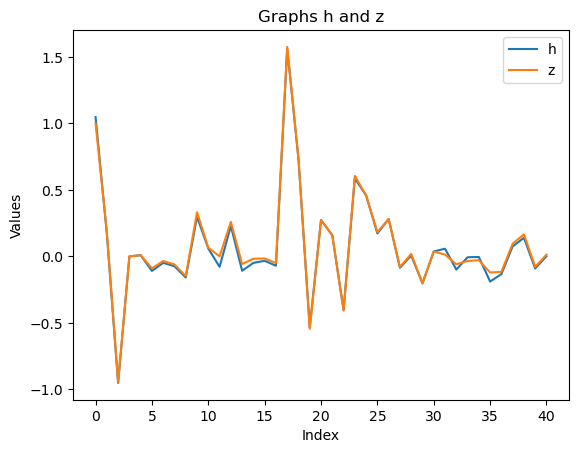

 repetition ------------->>>>>>>>>>>>>>>>> 11
state 

 [1.04651992 1.03143095 0.99612947 1.00915561 1.00864319 1.0452005
 1.03082181 1.06846793 1.01637739 1.00851277 1.0193901  1.0267017
 1.0250398  0.99763983]


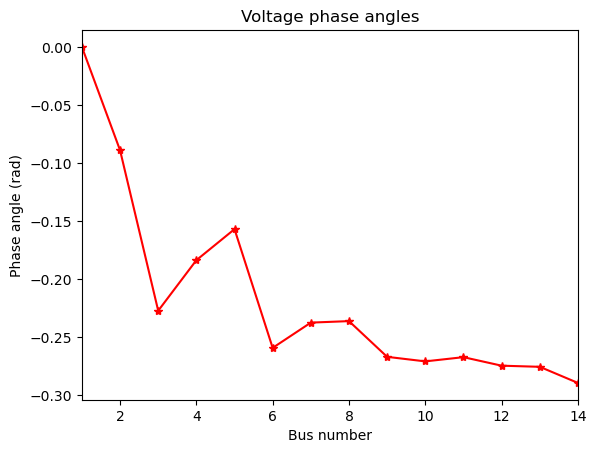

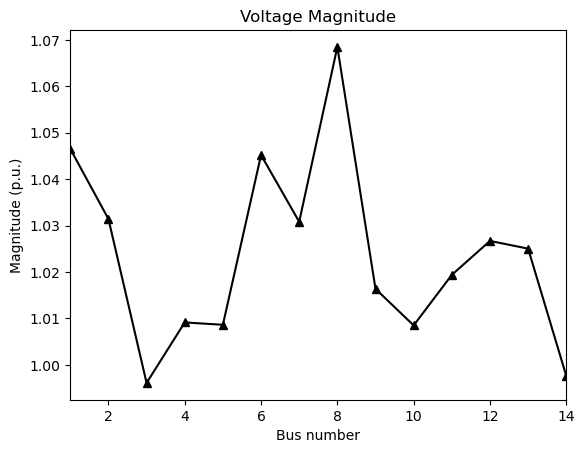

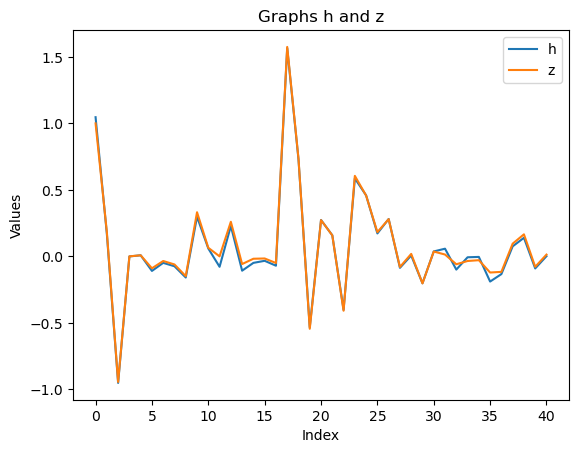

 repetition ------------->>>>>>>>>>>>>>>>> 12
state 

 [1.0456538  1.03055239 0.99522578 1.00825588 1.00775282 1.04433263
 1.0299548  1.06770405 1.01545803 1.00760981 1.01851077 1.02582432
 1.02414381 0.99672134]


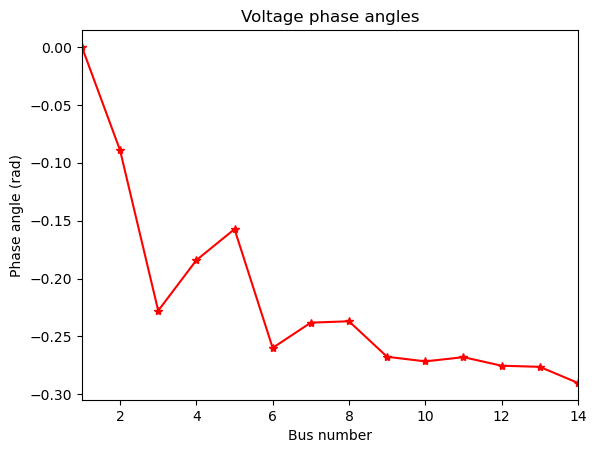

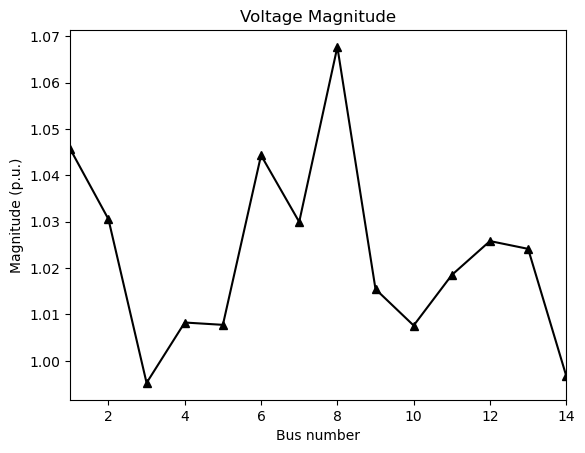

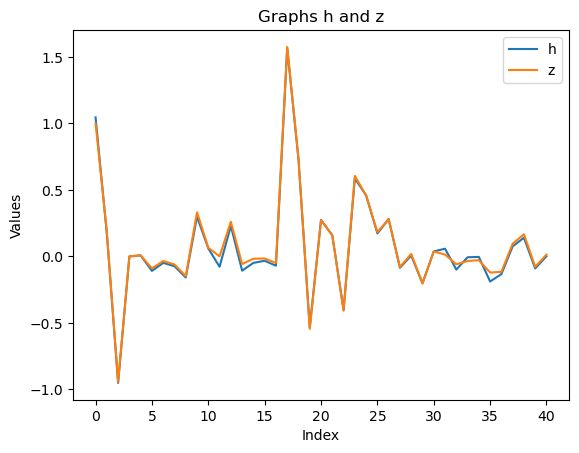

 repetition ------------->>>>>>>>>>>>>>>>> 13
state 

 [1.04483677 1.02972472 0.99437437 1.00740703 1.0069129  1.04350964
 1.02913456 1.06698049 1.01458743 1.00675447 1.01767706 1.02499139
 1.02329341 0.99585063]


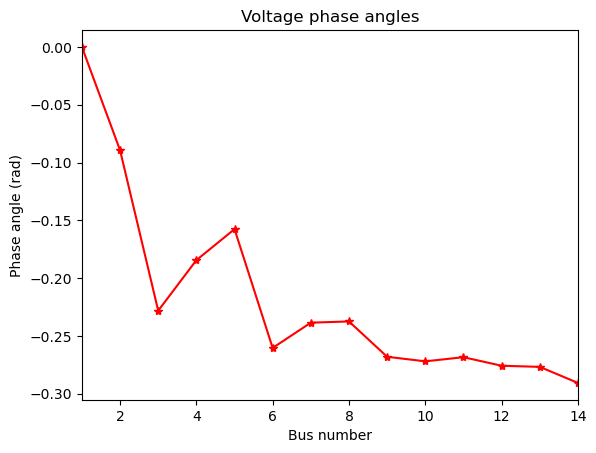

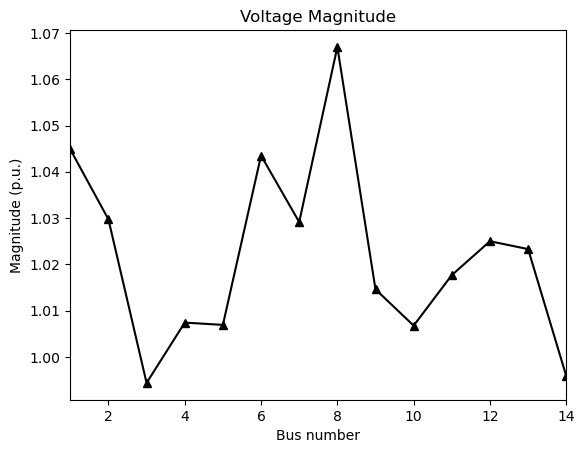

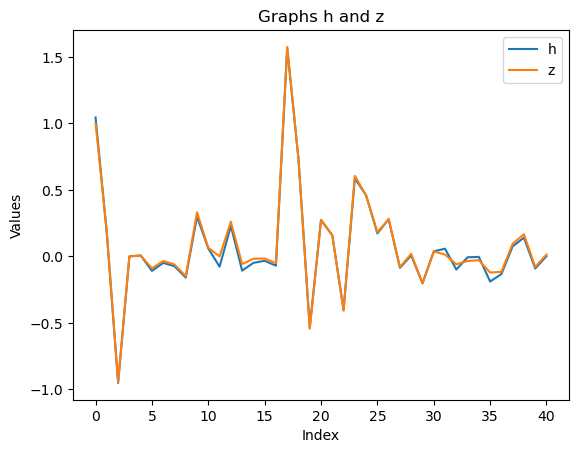

 repetition ------------->>>>>>>>>>>>>>>>> 14
state 

 [1.04407039 1.02894827 0.99357564 1.00661037 1.00612478 1.04273424
 1.02836303 1.06629877 1.01376749 1.00594895 1.01689172 1.02420582
 1.02249109 0.99502927]


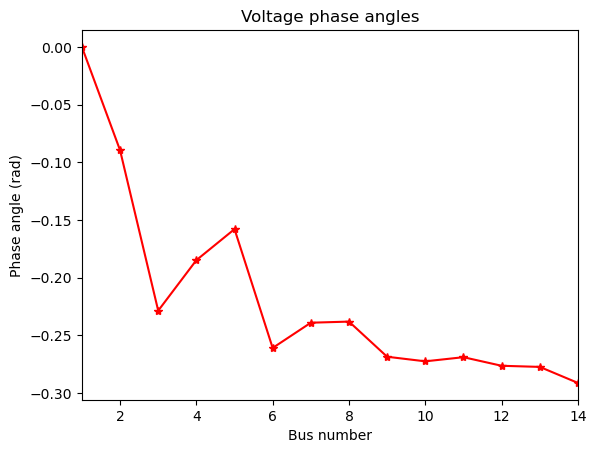

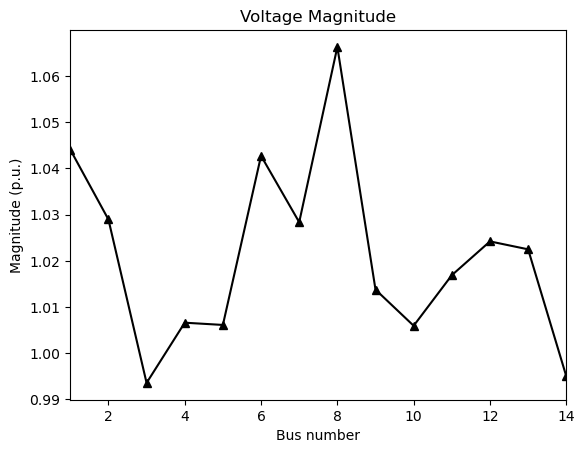

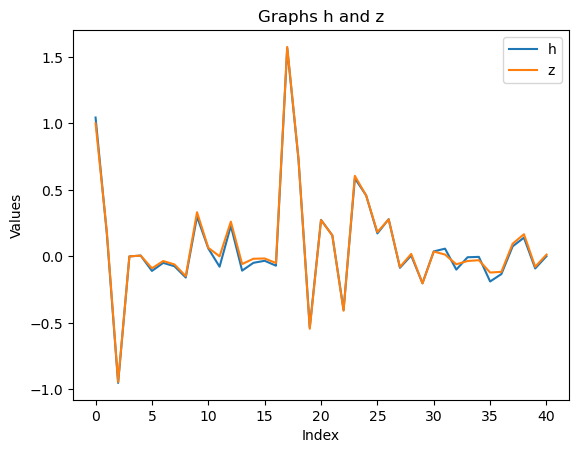

 repetition ------------->>>>>>>>>>>>>>>>> 15
state 

 [1.04335401 1.02822245 0.99282892 1.00586502 1.00538745 1.04200656
 1.02764017 1.06565928 1.01299949 1.00519405 1.0161551  1.02346822
 1.02173769 0.99425883]


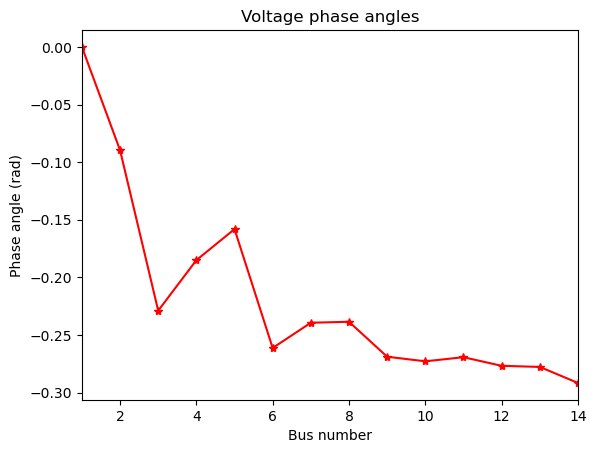

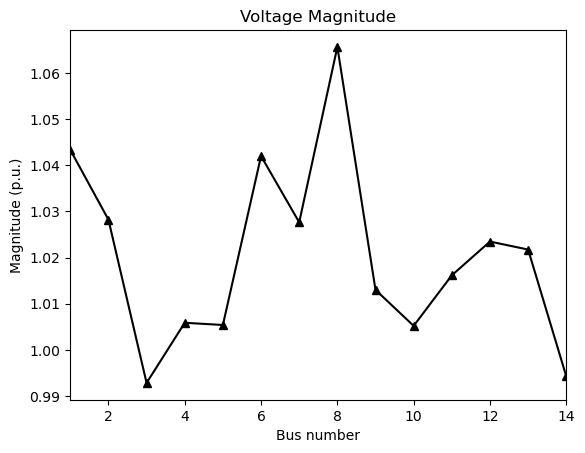

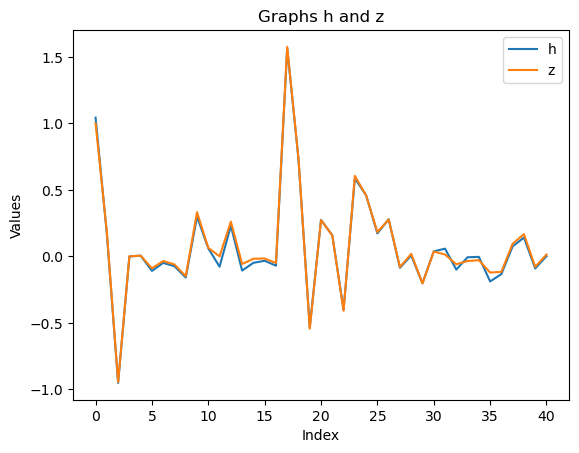

 repetition ------------->>>>>>>>>>>>>>>>> 16
state 

 [1.04268563 1.02754542 0.99213251 1.00516977 1.00469959 1.04132622
 1.02696494 1.06505953 1.01228246 1.00448909 1.01546672 1.02277828
 1.02103297 0.99353866]


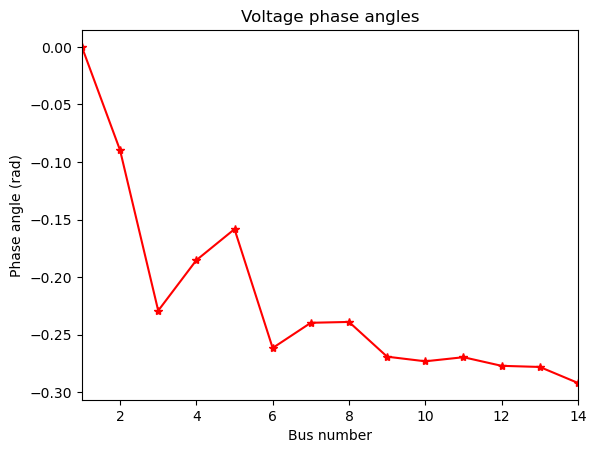

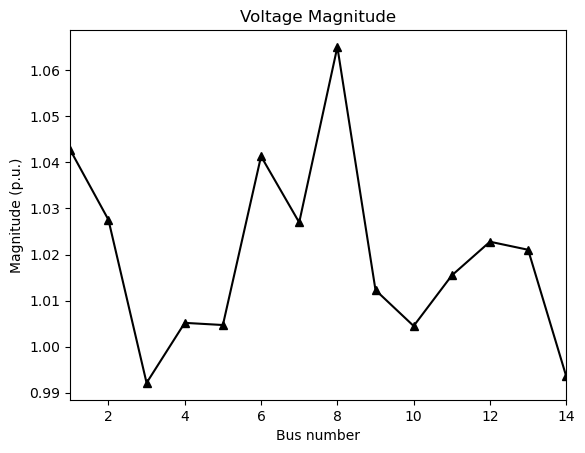

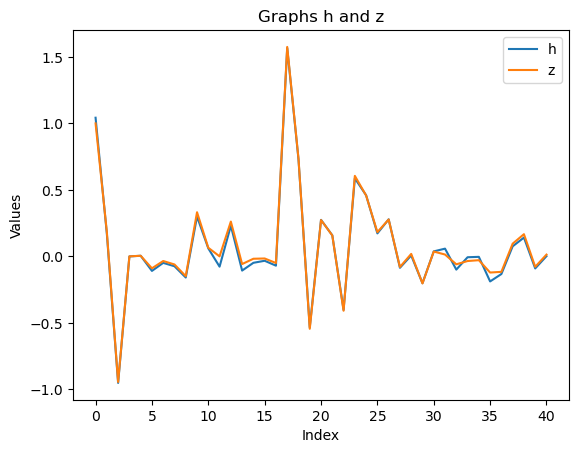

 repetition ------------->>>>>>>>>>>>>>>>> 17
state 

 [1.04206314 1.02691484 0.9914841  1.00452209 1.00405893 1.0406927
 1.02633559 1.06450067 1.01161411 1.00383223 1.0148256  1.02213552
 1.0203764  0.99286745]


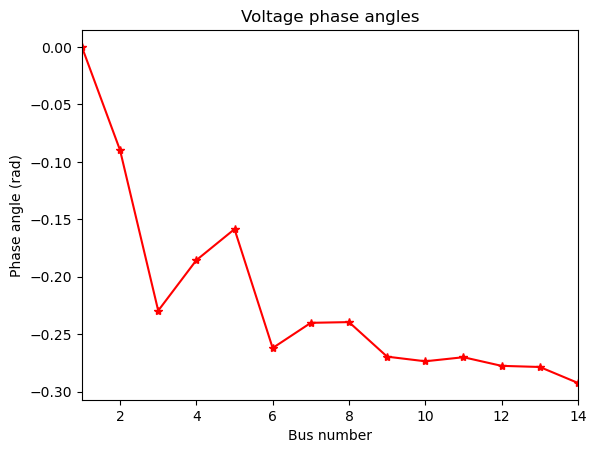

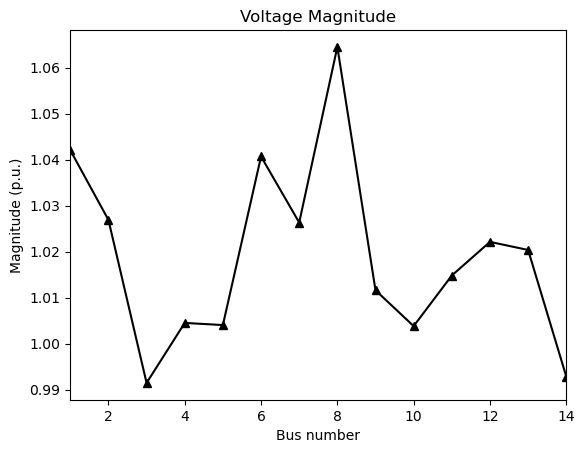

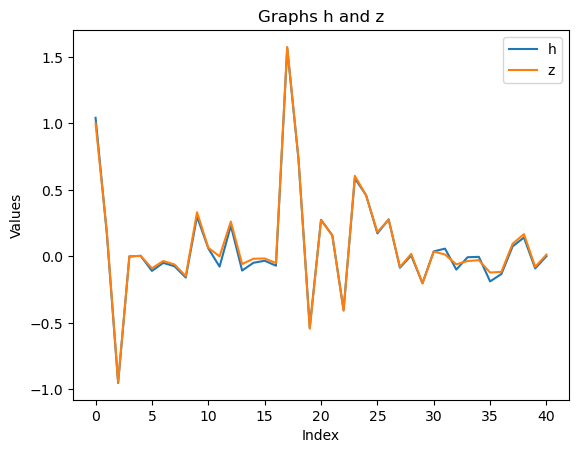

 repetition ------------->>>>>>>>>>>>>>>>> 18
state 

 [1.04148355 1.02632849 0.99088162 1.00392026 1.00346323 1.04010326
 1.02575012 1.06397828 1.01099294 1.00322167 1.0142294  1.02153756
 1.01976537 0.99224396]


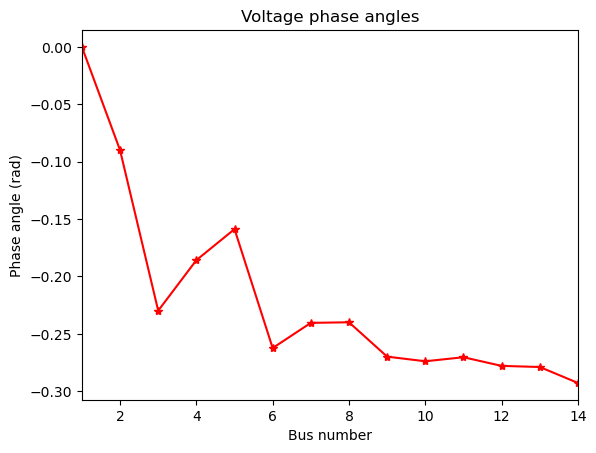

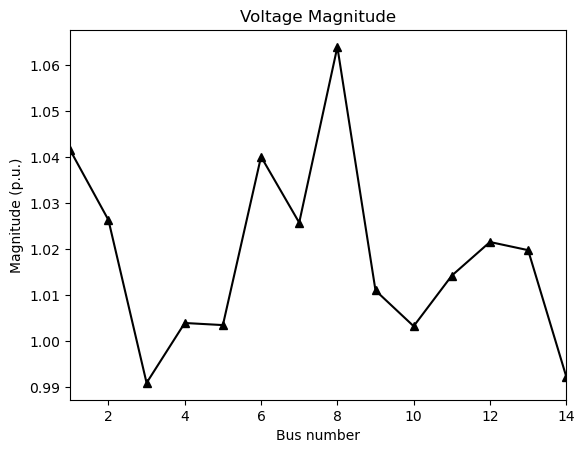

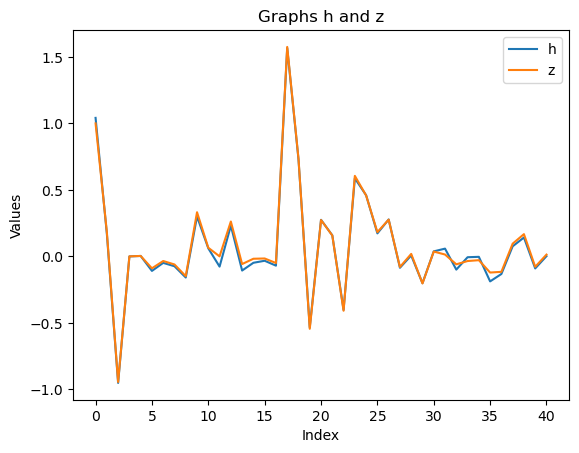

 repetition ------------->>>>>>>>>>>>>>>>> 19
state 

 [1.04094629 1.02578472 0.99032276 1.00336174 1.00291057 1.03955602
 1.02520625 1.06349176 1.01041656 1.00265498 1.01367587 1.0209823
 1.01919806 0.9916646 ]


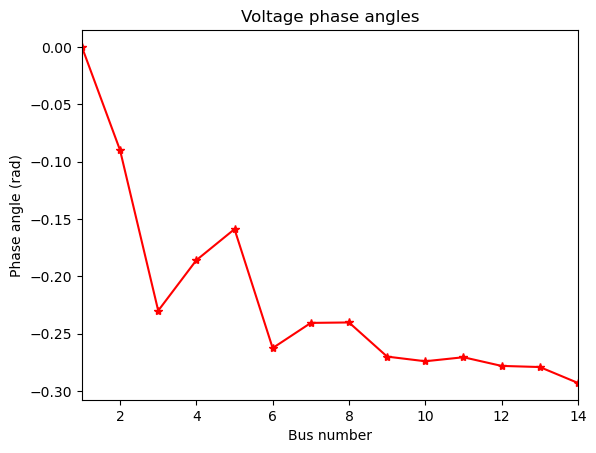

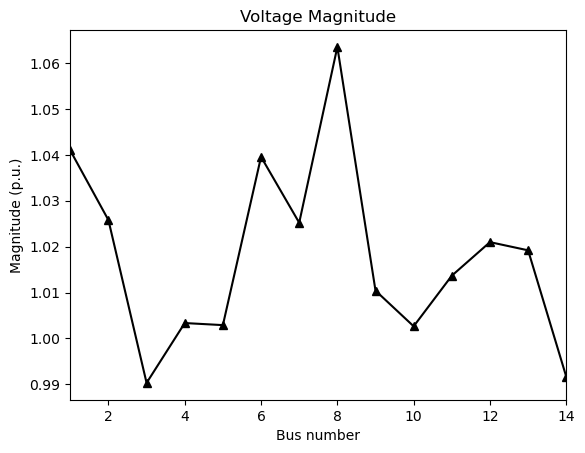

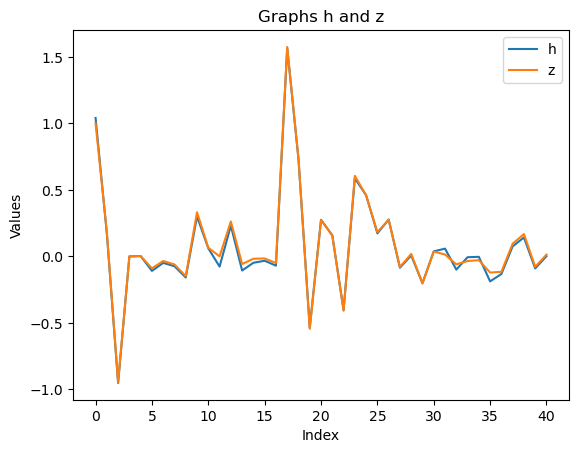

 repetition ------------->>>>>>>>>>>>>>>>> 20
state 

 [1.04044767 1.02528014 0.98980474 1.00284371 1.00239814 1.03904944
 1.02470107 1.06303664 1.00988207 1.00212991 1.01316341 1.02046809
 1.01867256 0.99112753]


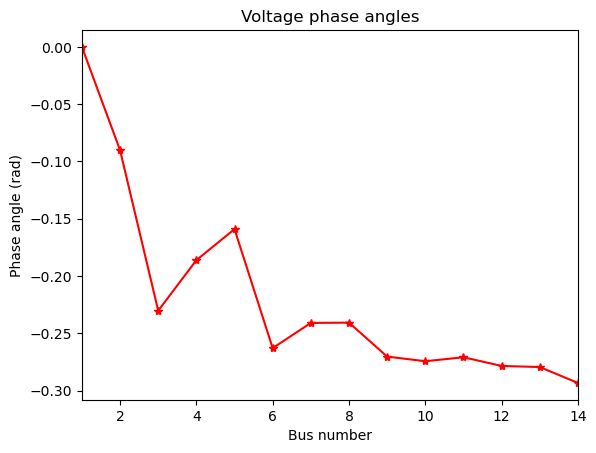

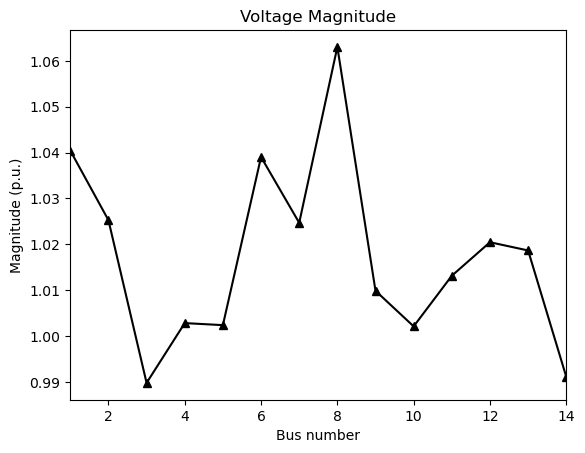

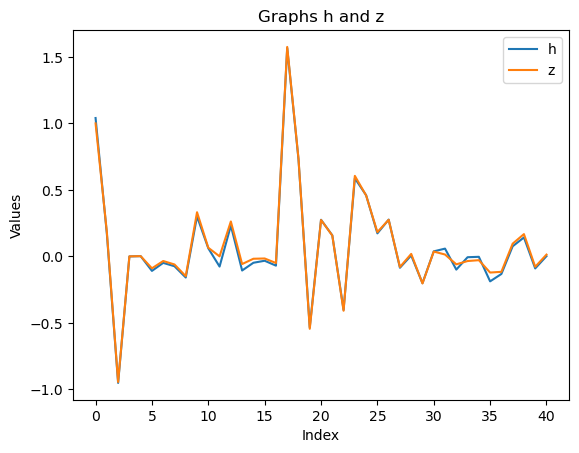

 repetition ------------->>>>>>>>>>>>>>>>> 21
state 

 [1.03998519 1.02481291 0.98932522 1.00236446 1.00192389 1.03857965
 1.02423281 1.06261245 1.00938811 1.0016442  1.01268864 1.01999137
 1.01818538 0.99063034]


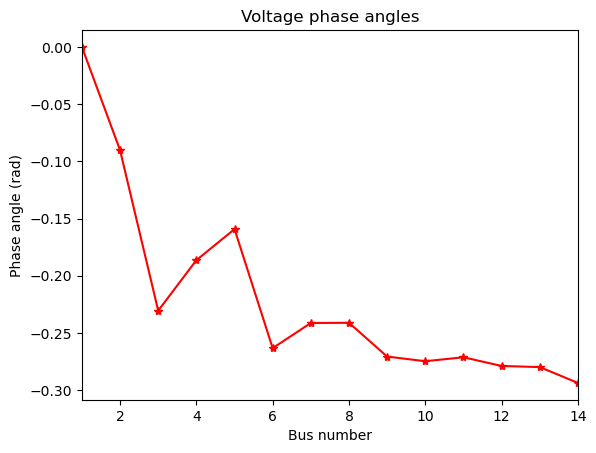

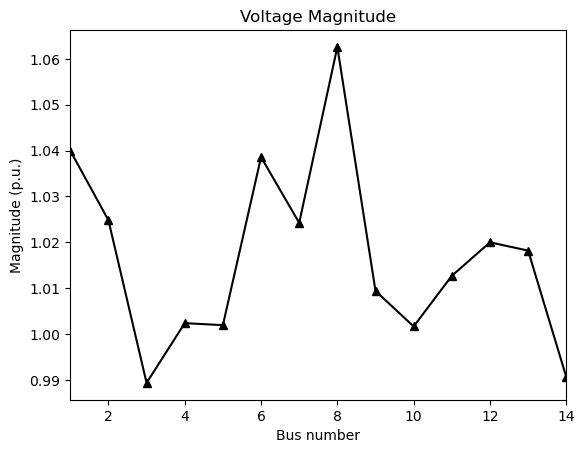

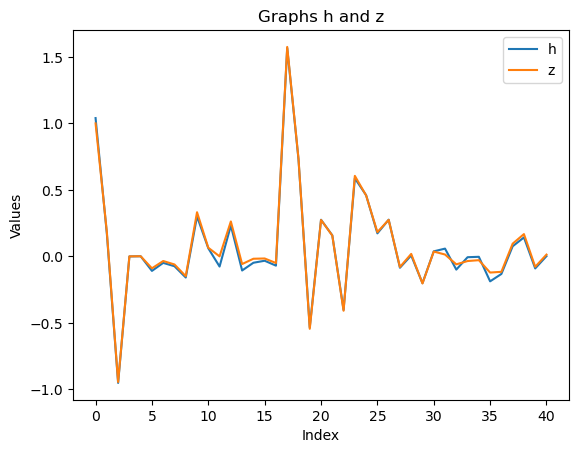

 repetition ------------->>>>>>>>>>>>>>>>> 22
state 

 [1.03955705 1.02438003 0.98888135 1.00192026 1.00148423 1.03814624
 1.02379864 1.06221723 1.00893127 1.00119522 1.01225028 1.01955132
 1.01773561 0.99017079]


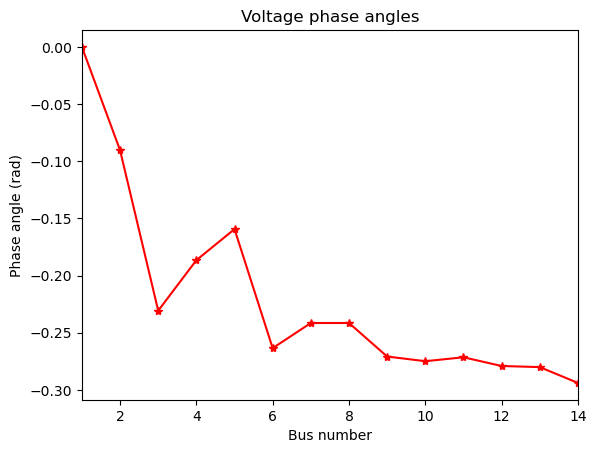

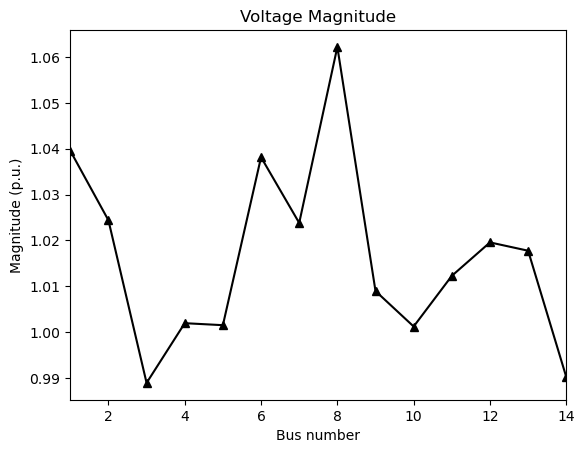

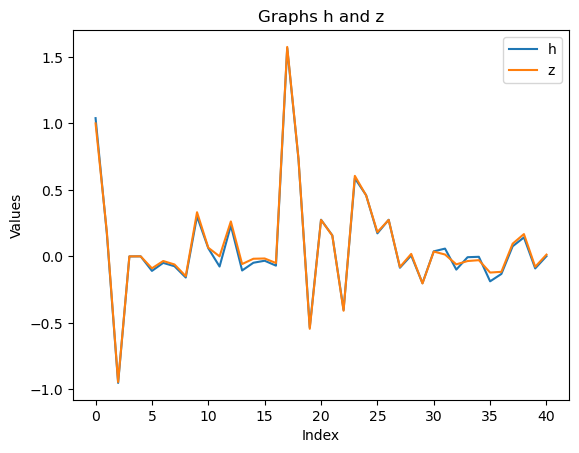

 repetition ------------->>>>>>>>>>>>>>>>> 23
state 

 [1.03916119 1.02398005 0.98847134 1.00151021 1.00107849 1.03774542
 1.02339656 1.06184705 1.00850961 1.00078081 1.01184536 1.01914451
 1.01731972 0.98974633]


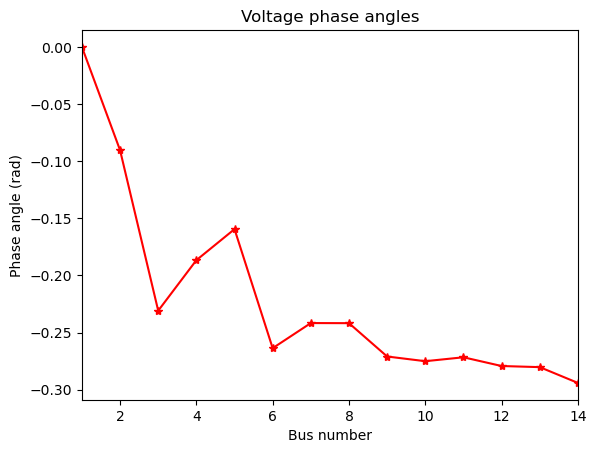

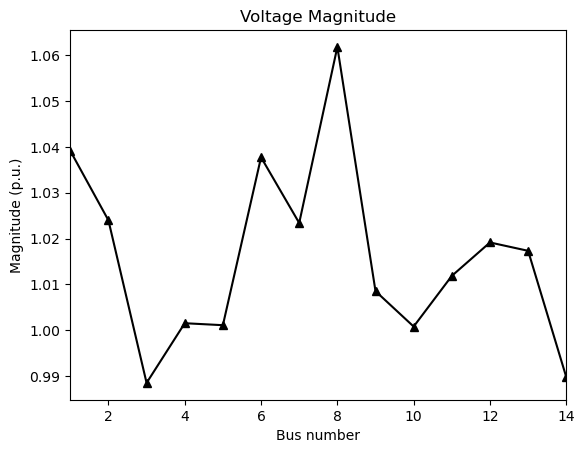

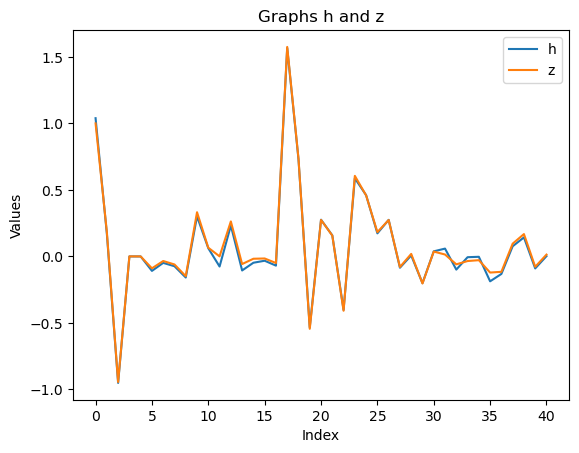

 repetition ------------->>>>>>>>>>>>>>>>> 24
state 

 [1.03879501 1.02361025 0.9880927  1.00113138 1.00070311 1.03737585
 1.02302393 1.06150011 1.00812037 1.00039835 1.01147187 1.01876915
 1.016936   0.98935531]


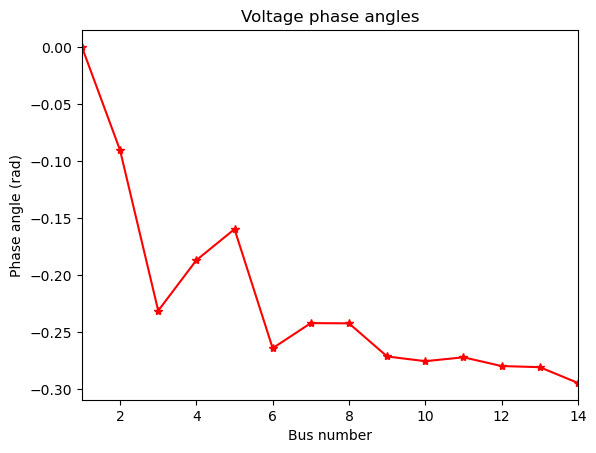

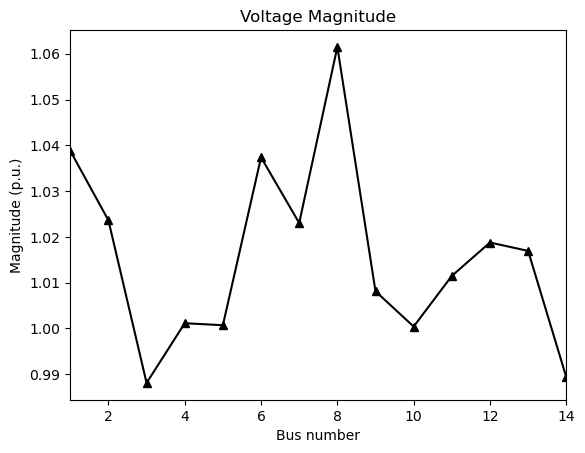

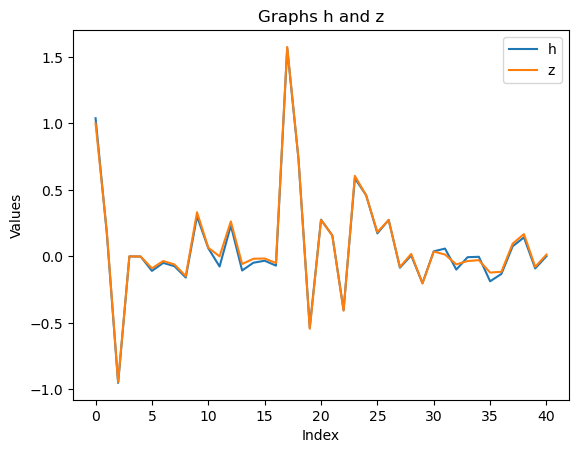

 repetition ------------->>>>>>>>>>>>>>>>> 25
state 

 [1.03845305 1.02326688 0.98774185 1.00078035 1.00035574 1.03703424
 1.02267802 1.06117503 1.00776044 1.00004507 1.01112695 1.01842254
 1.01658126 0.98899345]


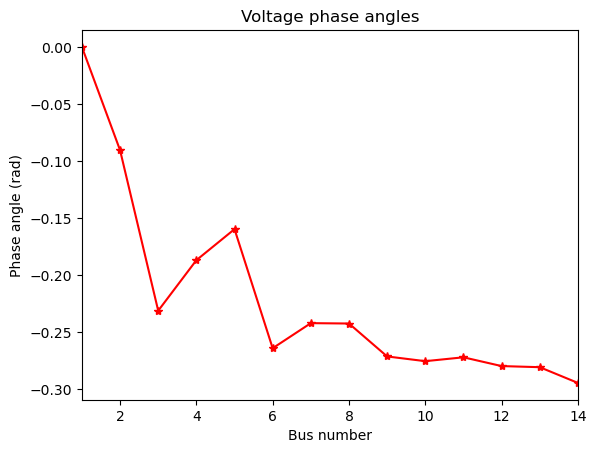

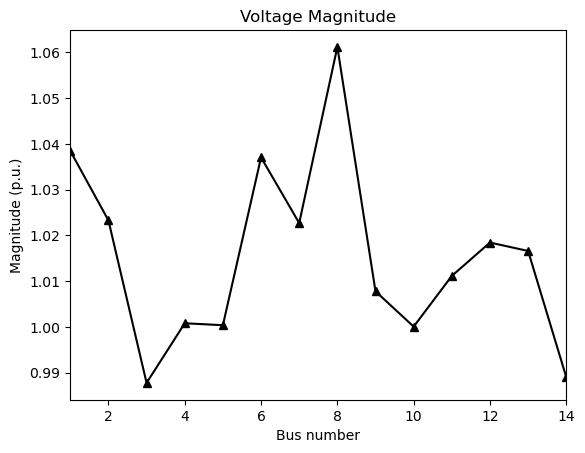

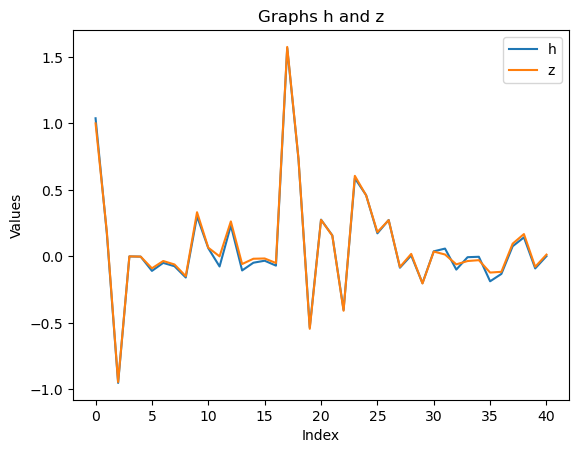

 repetition ------------->>>>>>>>>>>>>>>>> 26
state 

 [1.03813958 1.02295075 0.98741859 1.0004566  1.00003514 1.03672045
 1.02235762 1.06086926 1.00742963 0.9997201  1.01080973 1.01810374
 1.01625514 0.98866037]


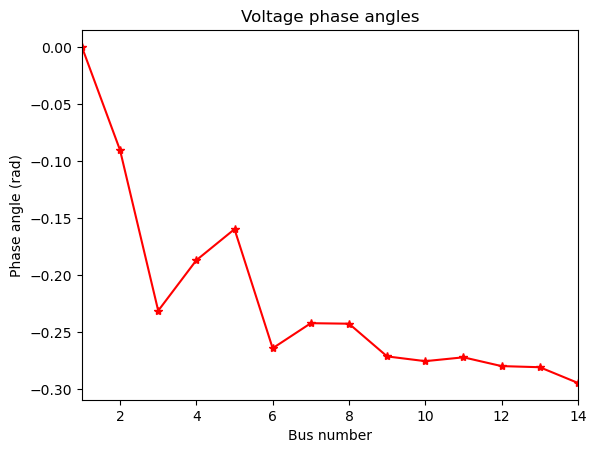

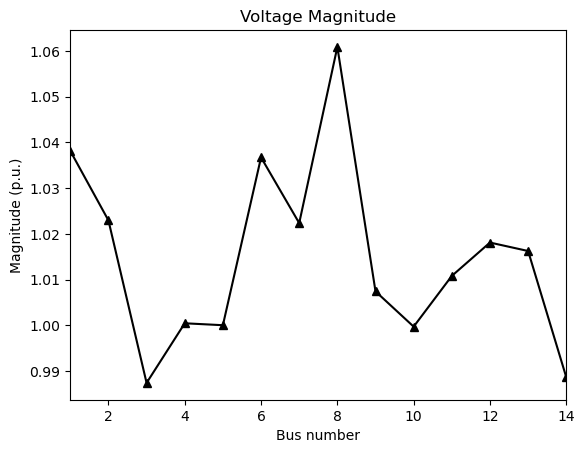

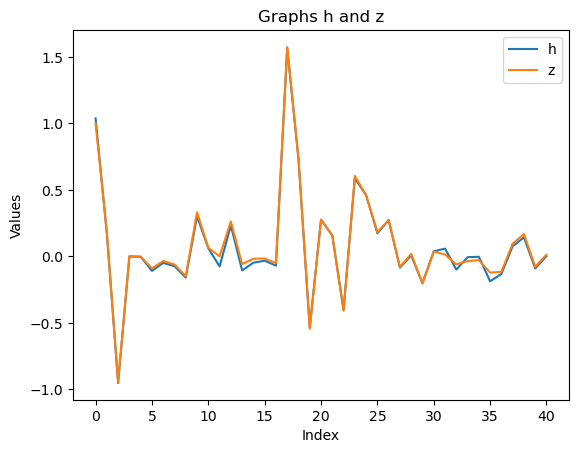

 repetition ------------->>>>>>>>>>>>>>>>> 27
state 

 [1.03785038 1.02265917 0.98712085 1.00015847 0.99974001 1.03643173
 1.02206088 1.06058021 1.00712538 0.99942144 1.01051823 1.01781049
 1.01595505 0.98835401]


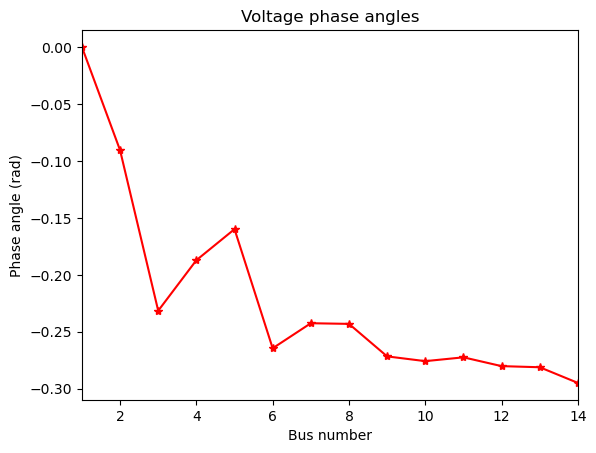

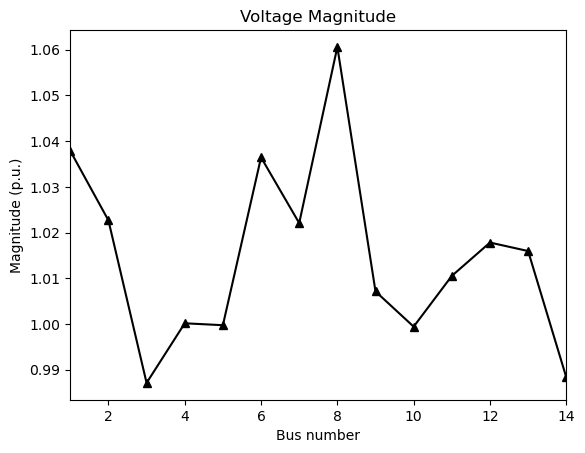

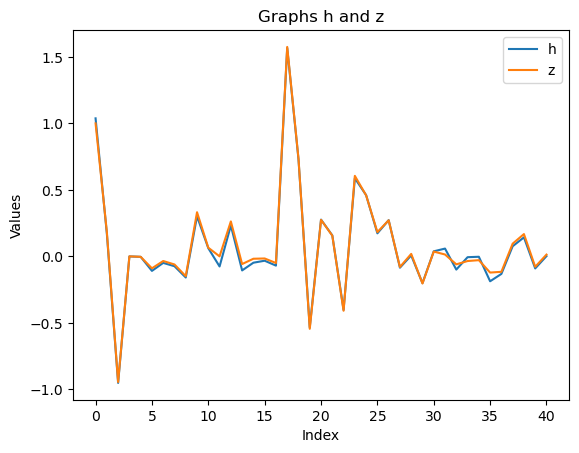

 repetition ------------->>>>>>>>>>>>>>>>> 28
state 

 [1.03758374 1.02239069 0.98684688 0.99988384 0.99946801 1.03616625
 1.02178609 1.06030816 1.00684581 0.99914684 1.0102501  1.01754082
 1.01567911 0.98807234]


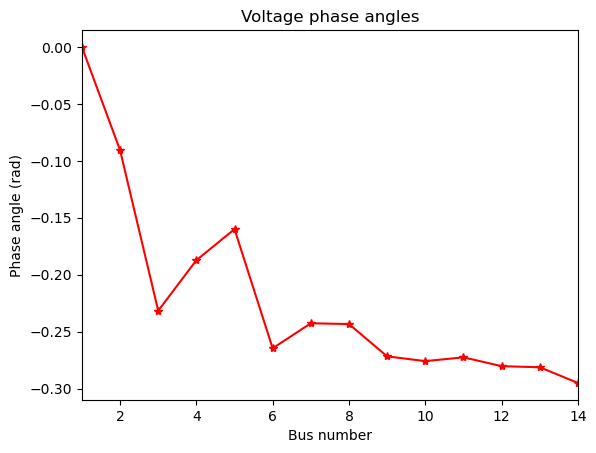

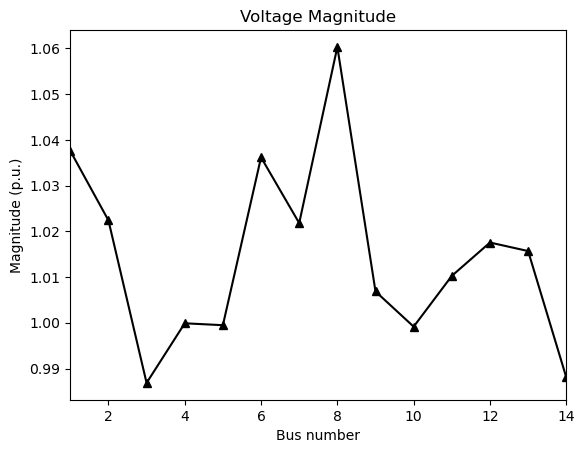

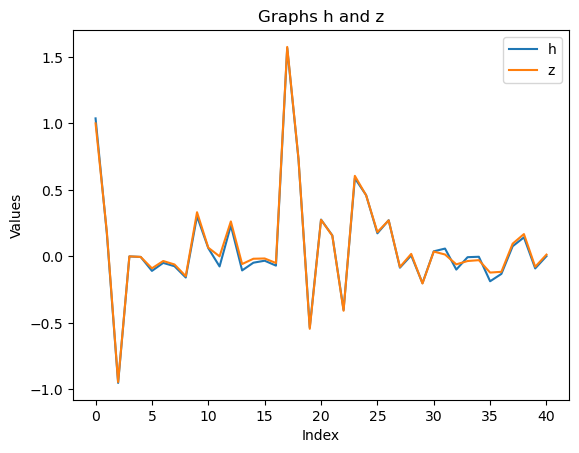

 repetition ------------->>>>>>>>>>>>>>>>> 29
state 

 [1.03733739 1.02214267 0.98659419 0.99963063 0.99921686 1.0359227
 1.02153152 1.06005184 1.00658879 0.99889478 1.01000427 1.01729346
 1.01542573 0.9878136 ]


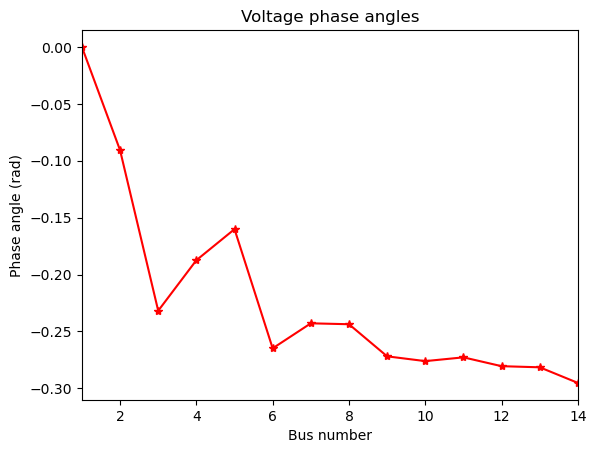

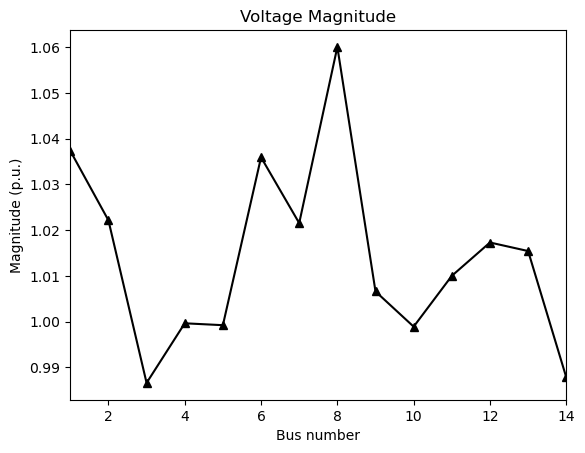

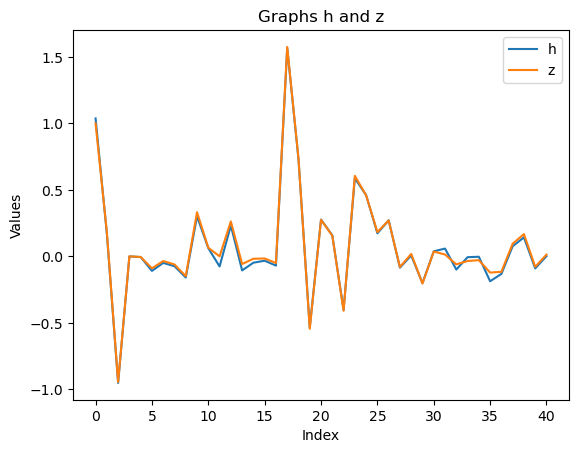

 repetition ------------->>>>>>>>>>>>>>>>> 30
state 

 [1.03710738 1.02191271 0.9863606  0.99939652 0.99898509 1.03569766
 1.02129449 1.05980678 1.00635208 0.99866262 1.00977756 1.01706499
 1.01519154 0.98757494]


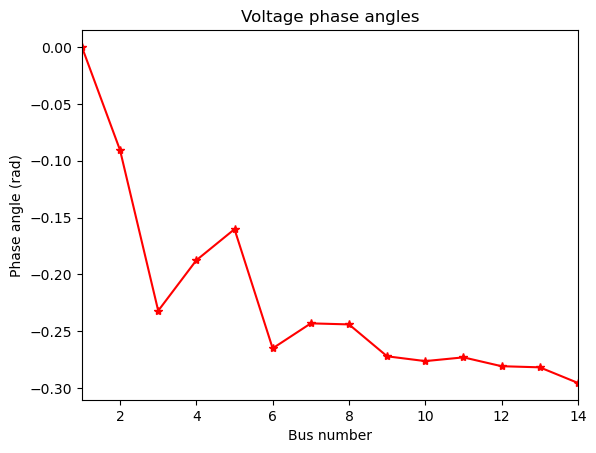

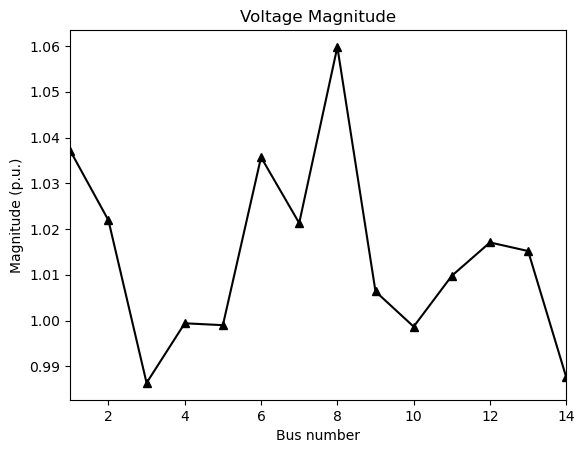

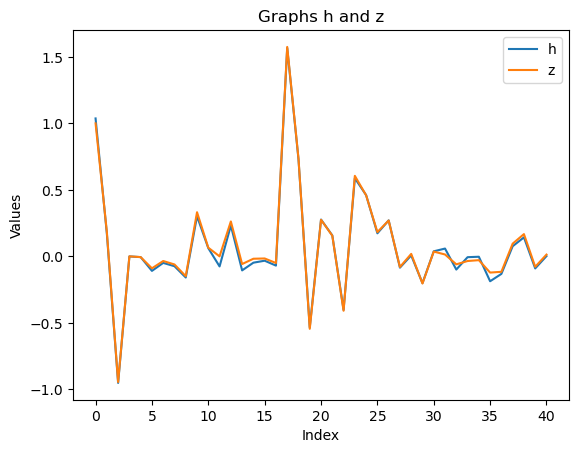

 repetition ------------->>>>>>>>>>>>>>>>> 31
state 

 [1.03689698 1.02170146 0.98614564 0.99918077 0.99877129 1.0354924
 1.02107408 1.05957225 1.00613541 0.99845007 1.00957029 1.01685629
 1.01497769 0.98735714]


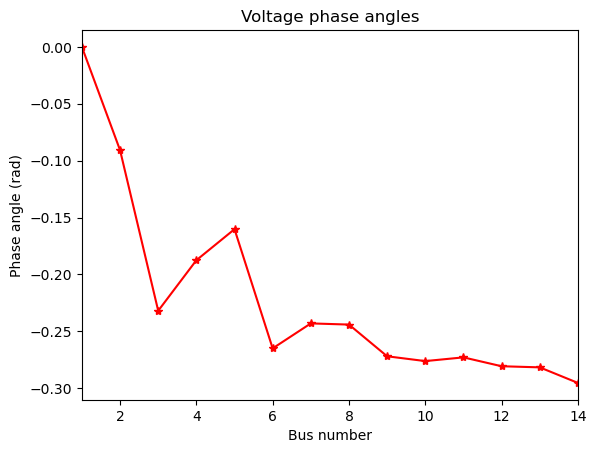

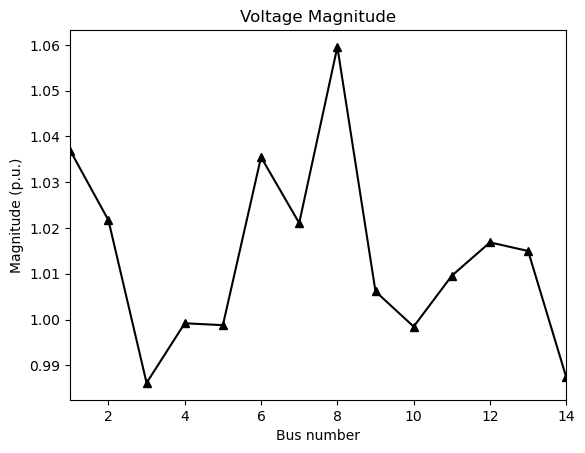

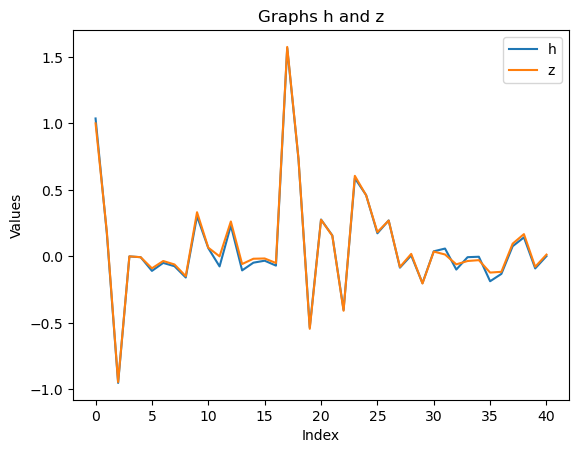

 repetition ------------->>>>>>>>>>>>>>>>> 32
state 

 [1.03670312 1.02150697 0.9859484  0.99898286 0.99857511 1.03530398
 1.02086987 1.0593492  1.00593748 0.99825563 1.00938032 1.01666473
 1.01478157 0.98715732]


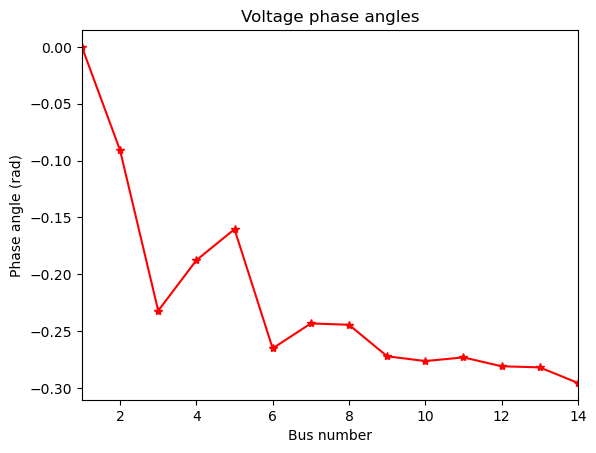

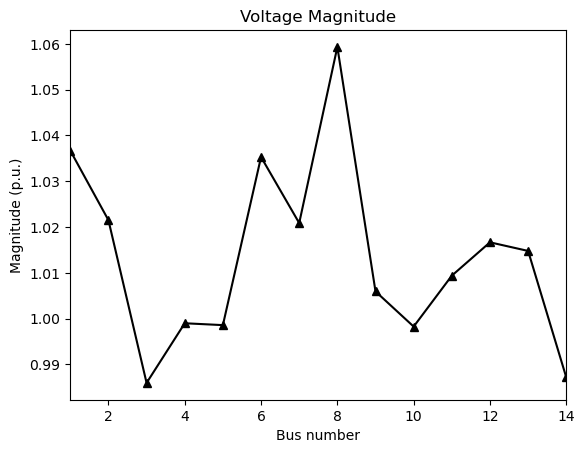

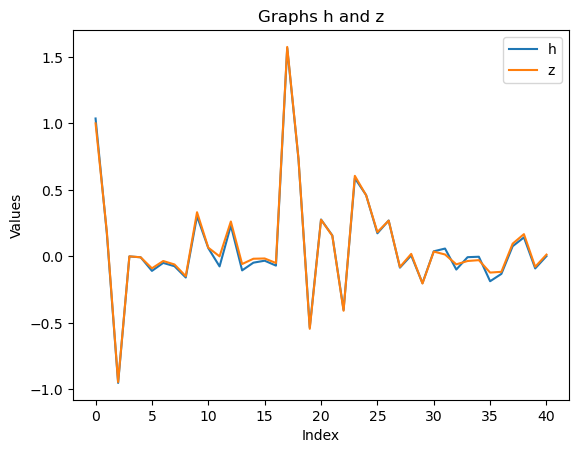

 repetition ------------->>>>>>>>>>>>>>>>> 33
state 

 [1.03652471 1.02132811 0.98576713 0.99880064 0.99839447 1.0351318
 1.02067985 1.05913548 1.00575537 0.9980774  1.0092068  1.01648974
 1.01460191 0.98697399]


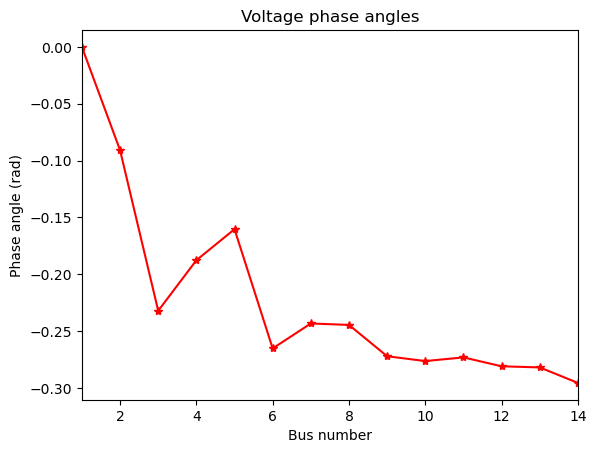

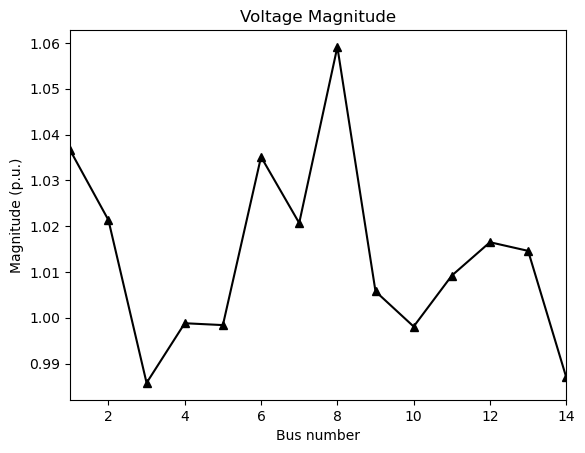

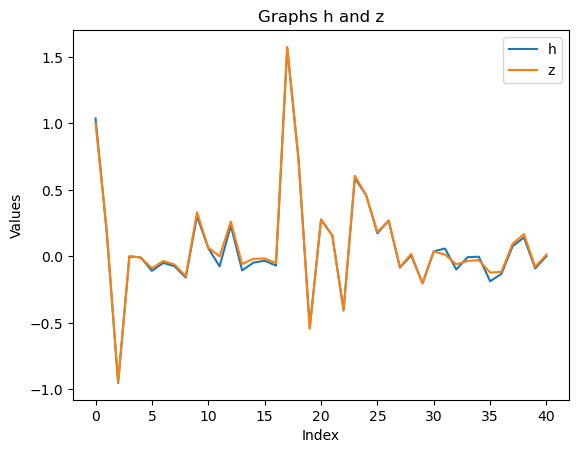

 repetition ------------->>>>>>>>>>>>>>>>> 34
state 

 [1.03635716 1.02116115 0.98559863 0.9986317  0.99822706 1.03497365
 1.02050192 1.05892839 1.00558851 0.997914   1.0090475  1.01632902
 1.01443693 0.98680578]


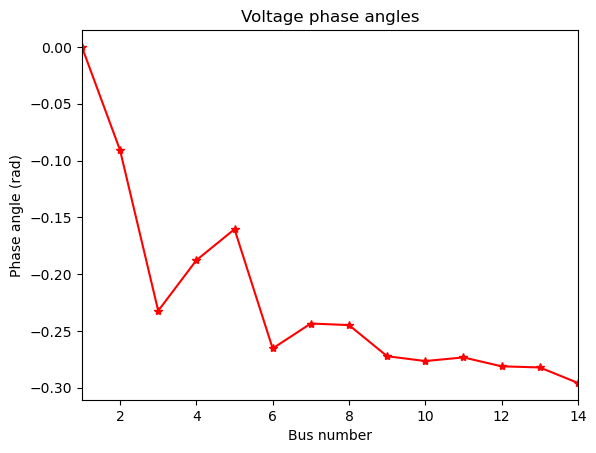

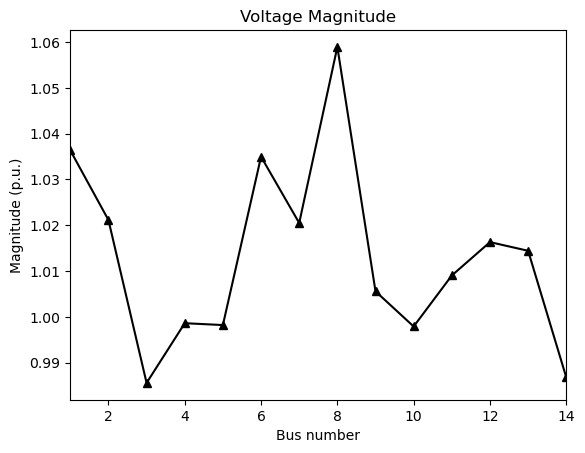

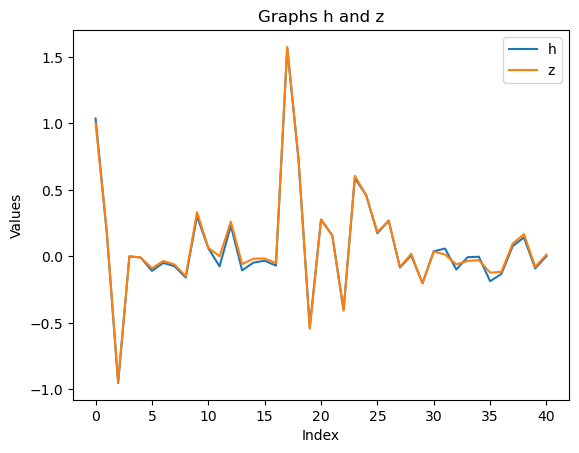

 repetition ------------->>>>>>>>>>>>>>>>> 35
state 

 [1.03620454 1.02100857 0.9854444  0.99847656 0.99807329 1.03482986
 1.02033604 1.05872788 1.00543621 0.99776502 1.00890262 1.01618281
 1.01428672 0.98665233]


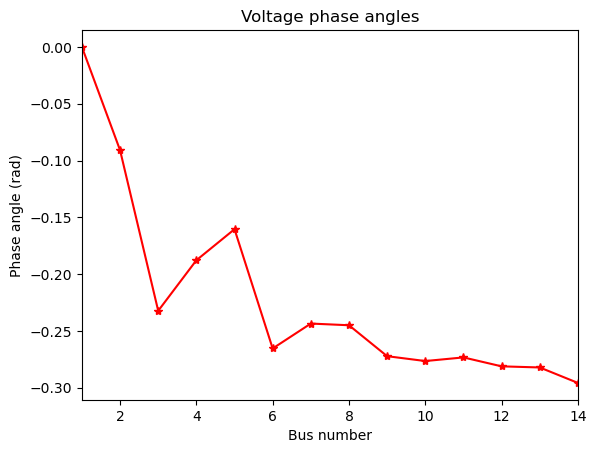

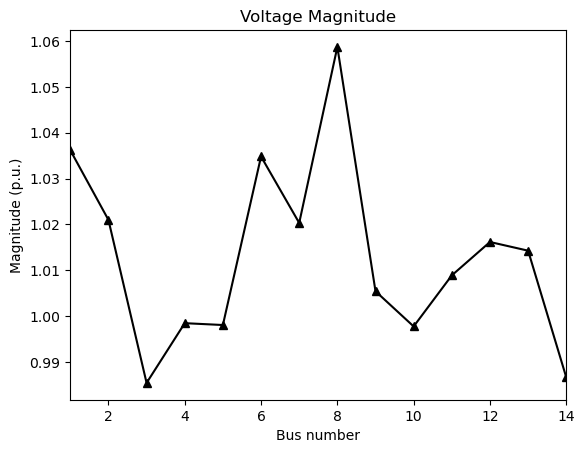

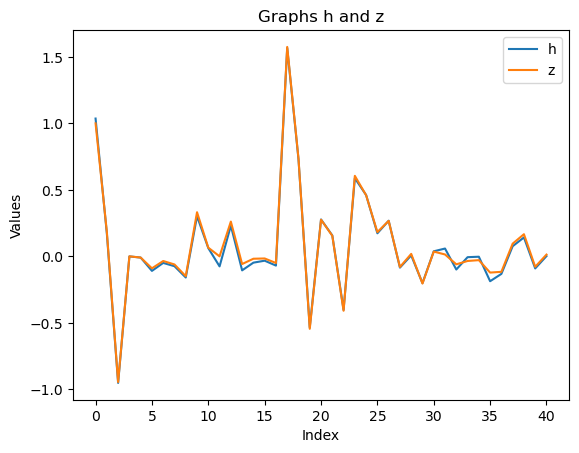

 repetition ------------->>>>>>>>>>>>>>>>> 36
state 

 [1.03606411 1.02086793 0.98530248 0.99833389 0.99793155 1.03469875
 1.02018125 1.05853376 1.00529811 0.99762951 1.00877043 1.01604935
 1.01414968 0.98651307]


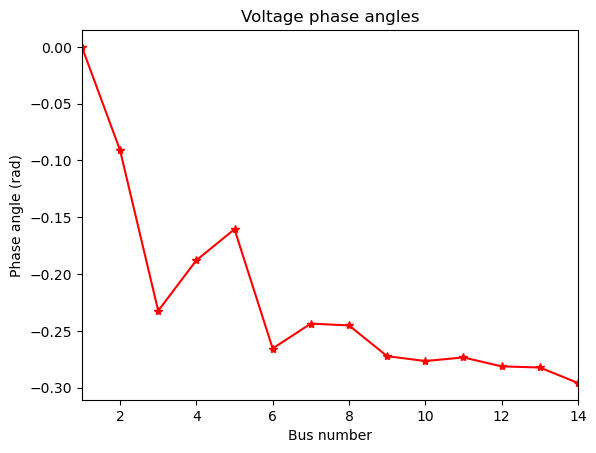

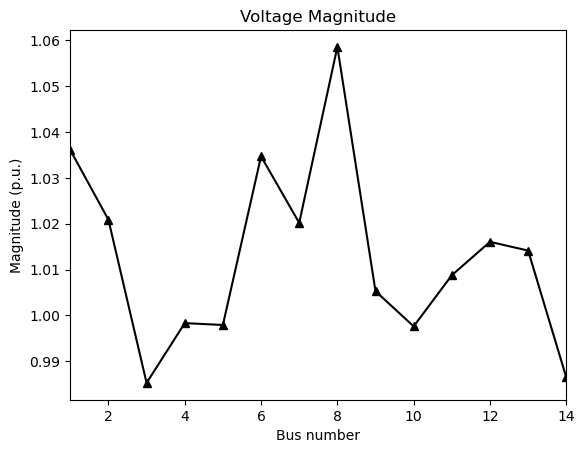

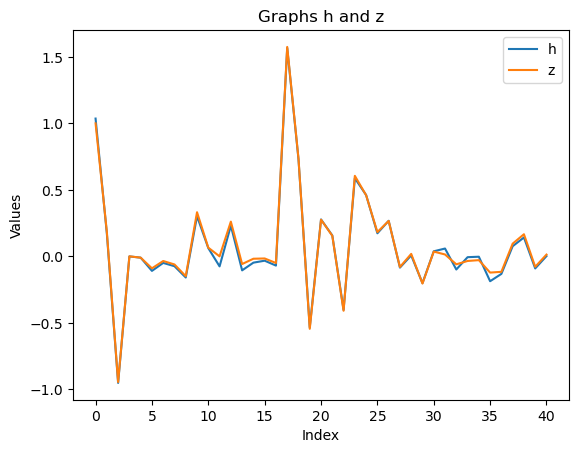

 repetition ------------->>>>>>>>>>>>>>>>> 37
state 

 [1.03593471 1.02073882 0.98517263 0.99820317 0.99780202 1.03457937
 1.02003691 1.05834527 1.00517195 0.99750632 1.00865056 1.01592801
 1.01402474 0.98638594]


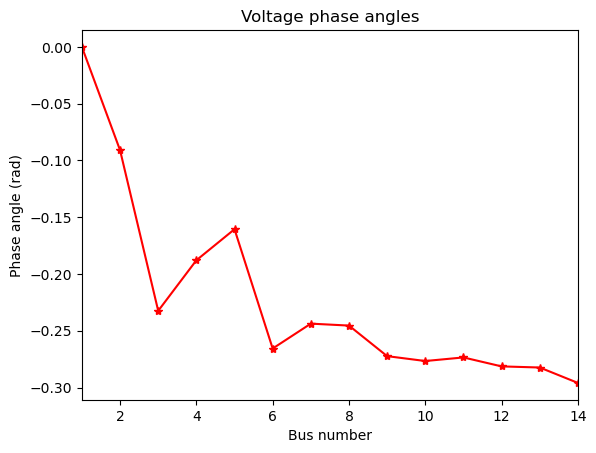

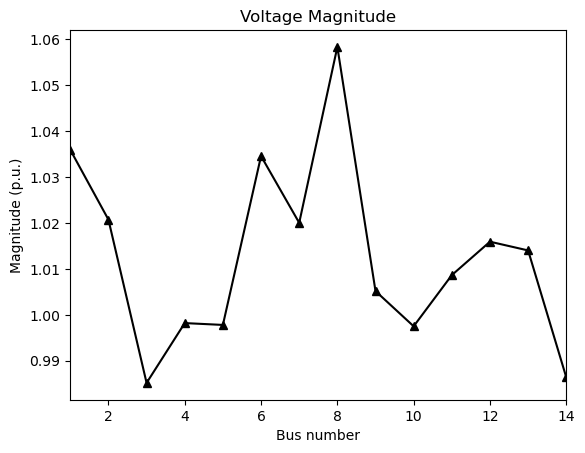

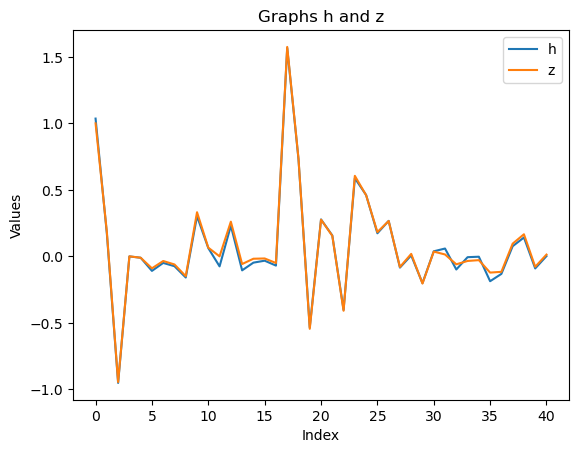

 repetition ------------->>>>>>>>>>>>>>>>> 38
state 

 [1.03581249 1.0206181  0.98505167 0.99808163 0.99768125 1.03446964
 1.01990077 1.05816109 1.0050565  0.99739324 1.00854026 1.01581639
 1.01390994 0.98626917]


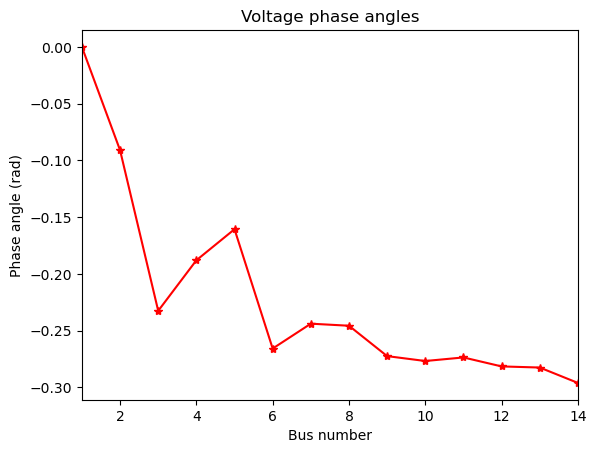

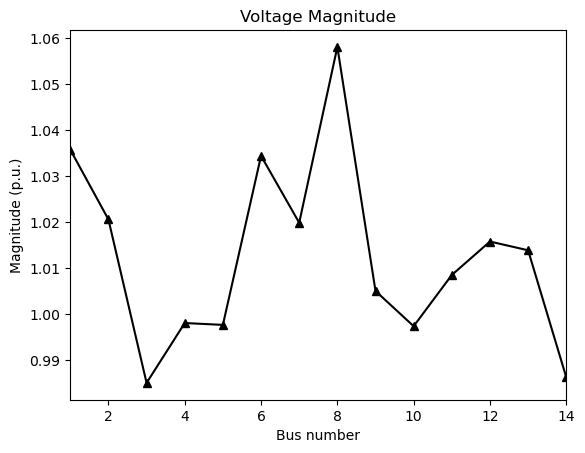

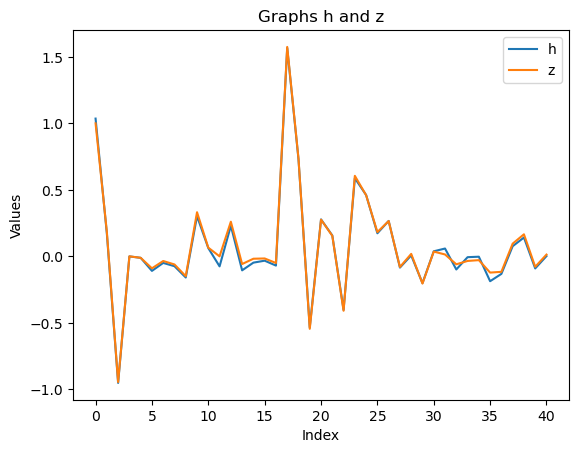

 repetition ------------->>>>>>>>>>>>>>>>> 39
state 

 [1.03570187 1.02050771 0.98494095 0.99797034 0.99757064 1.03437056
 1.01977315 1.05798032 1.00495175 0.99729088 1.00844077 1.0157157
 1.01380655 0.98616334]


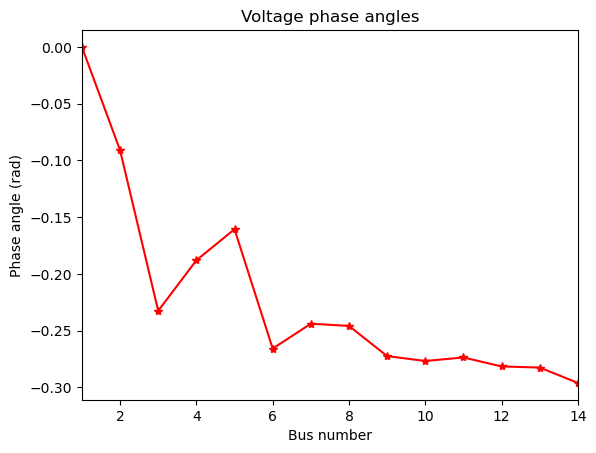

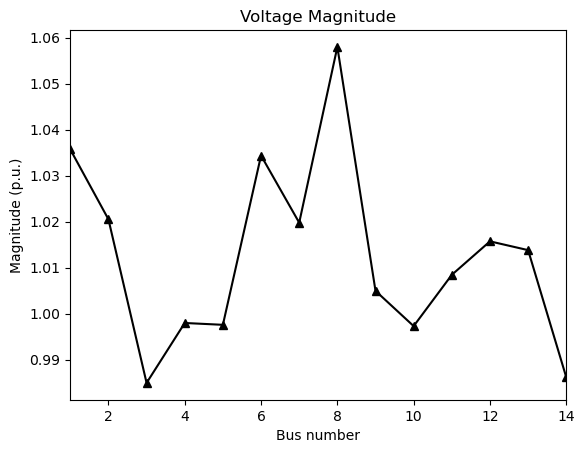

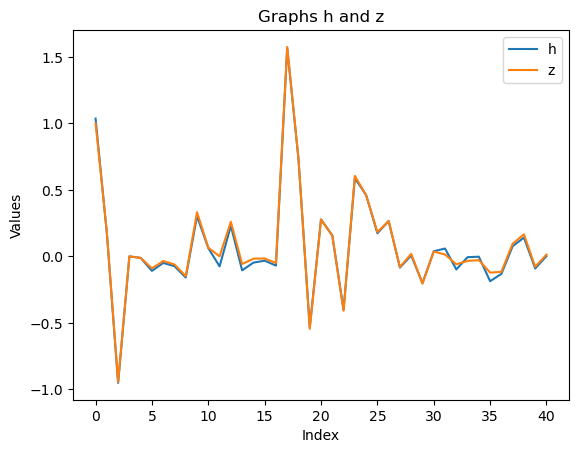

 repetition ------------->>>>>>>>>>>>>>>>> 40
state 

 [1.03560006 1.02040625 0.98483958 0.99786807 0.99746911 1.03428091
 1.01965301 1.05780195 1.00485677 0.99719815 1.00835066 1.01562447
 1.01371235 0.98606795]


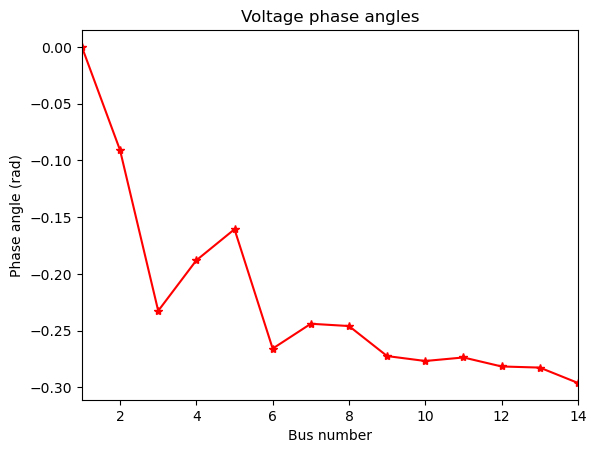

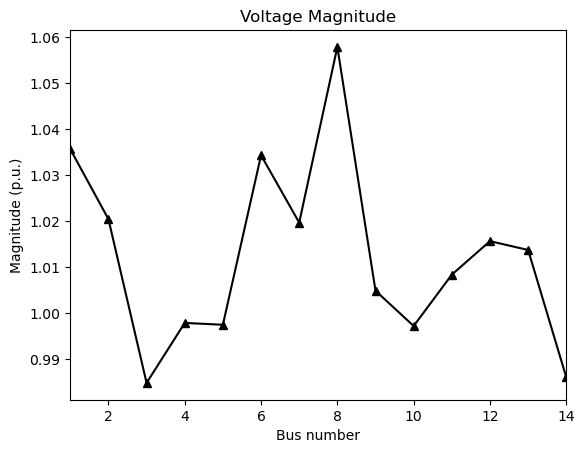

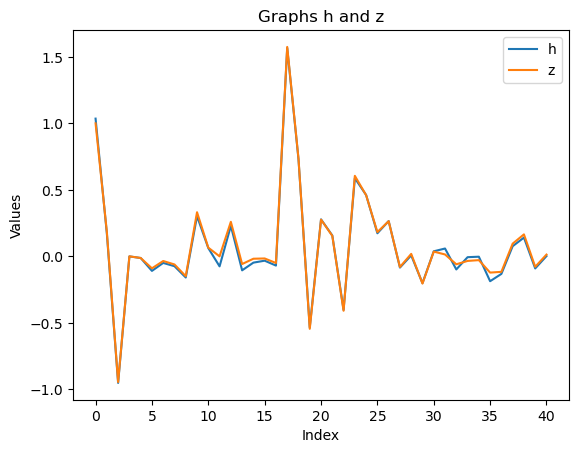

 repetition ------------->>>>>>>>>>>>>>>>> 41
state 

 [1.03550358 1.02031114 0.98474484 0.99777296 0.99737448 1.03419888
 1.01953913 1.0576259  1.00477047 0.99711374 1.00826841 1.01554097
 1.01362629 0.98598057]


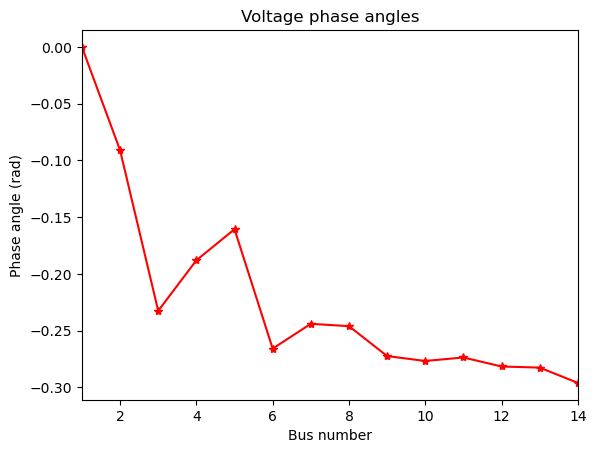

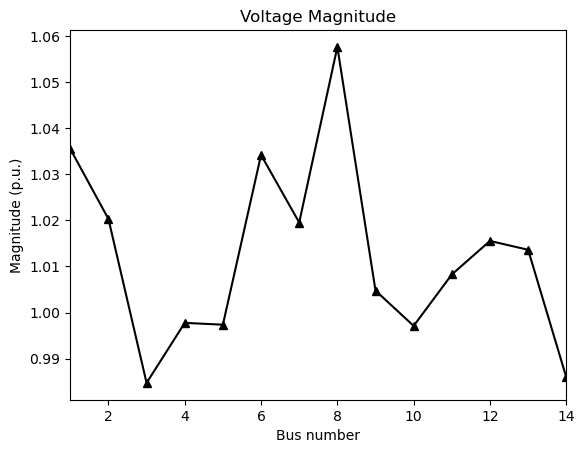

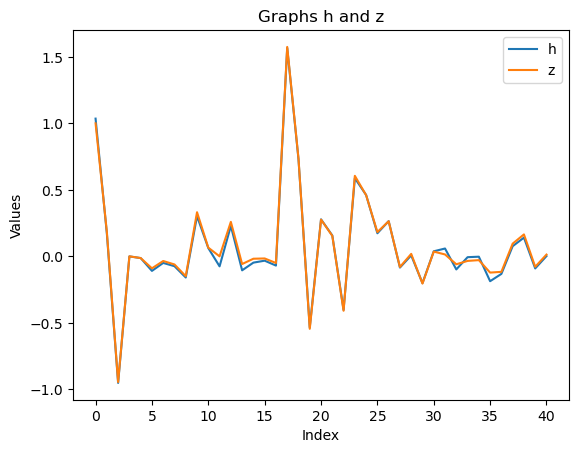

 repetition ------------->>>>>>>>>>>>>>>>> 42
state 

 [1.03541668 1.02022478 0.9846588  0.99768601 0.99728799 1.03412554
 1.0194318  1.05745274 1.00469191 0.99703741 1.00819472 1.01546615
 1.01354885 0.98590133]


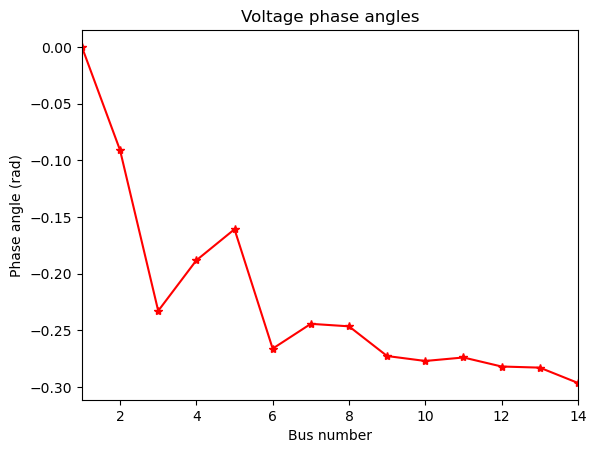

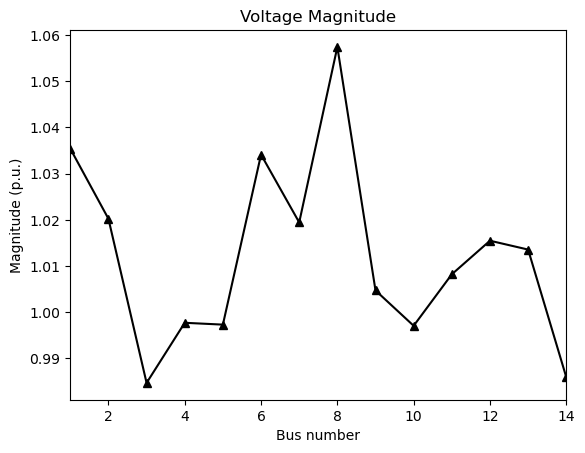

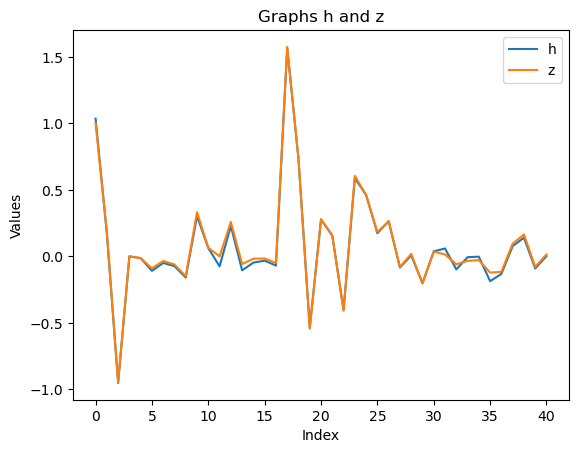

 repetition ------------->>>>>>>>>>>>>>>>> 43
state 

 [1.0353334  1.02014348 0.98457831 0.99760511 0.99720753 1.03405904
 1.01932951 1.05727966 1.00462122 0.9969687  1.00812814 1.01539845
 1.01347852 0.98583042]


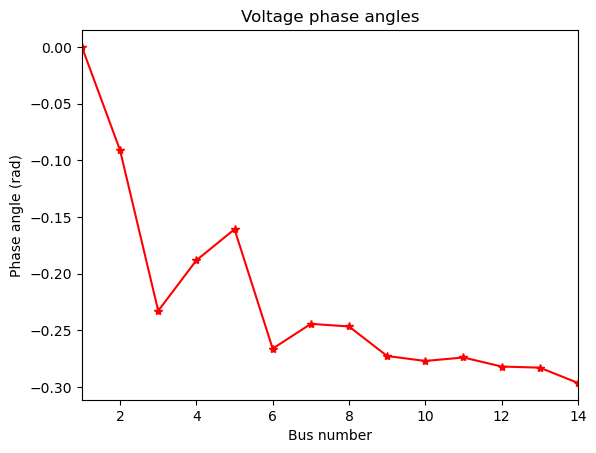

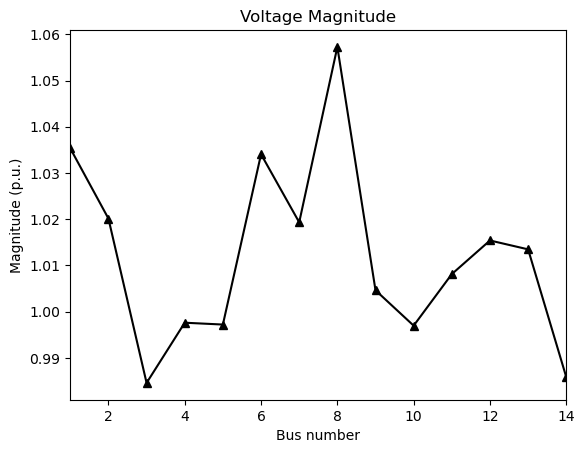

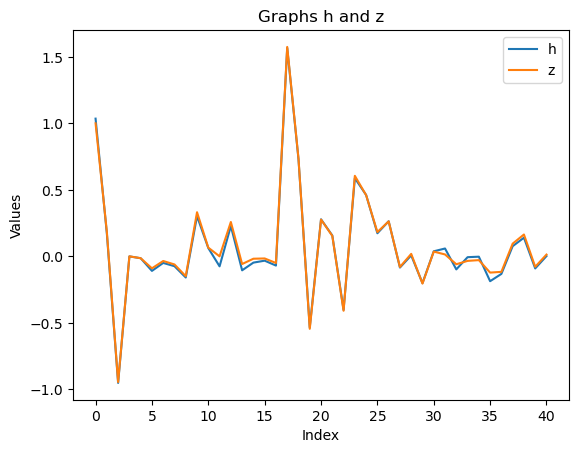

 repetition ------------->>>>>>>>>>>>>>>>> 44
state 

 [1.03525931 1.02006981 0.98450505 0.99753117 0.99713419 1.0339993
 1.01923275 1.05710831 1.00455784 0.9969069  1.00806825 1.01533773
 1.01341598 0.9857663 ]


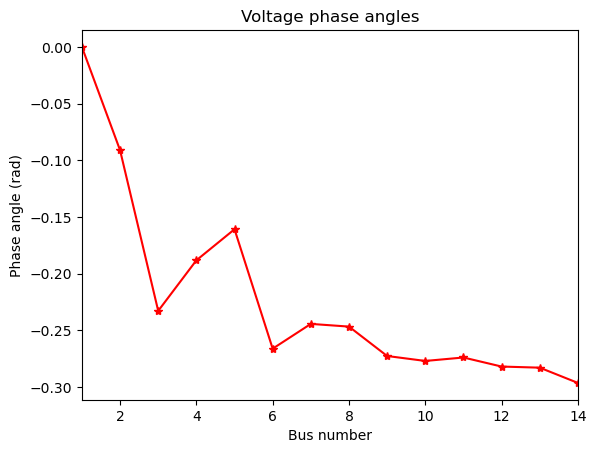

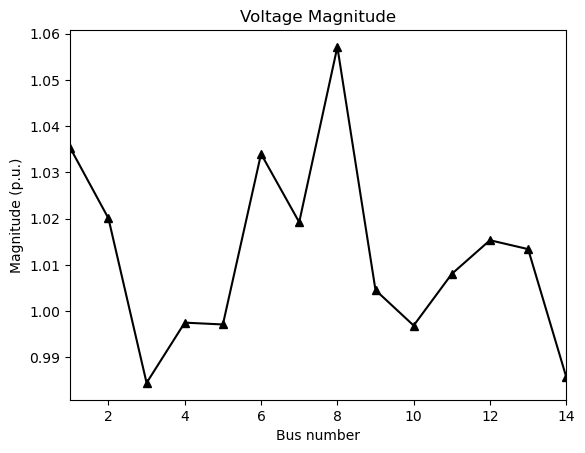

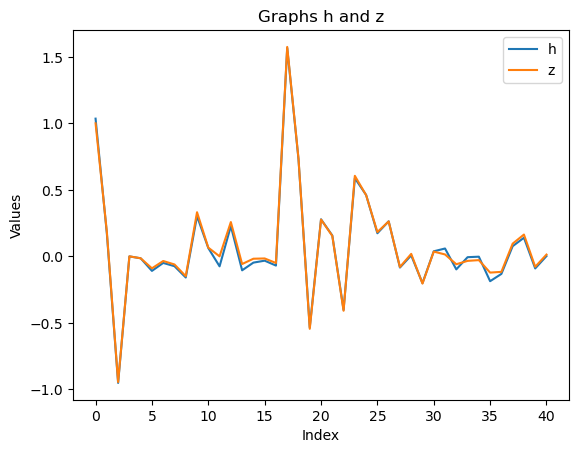

 repetition ------------->>>>>>>>>>>>>>>>> 45
state 

 [1.03519136 1.02000228 0.9844382  0.99746374 0.99706692 1.03394583
 1.01914112 1.05693828 1.00450152 0.99685192 1.00801483 1.01528311
 1.01335938 0.98570887]


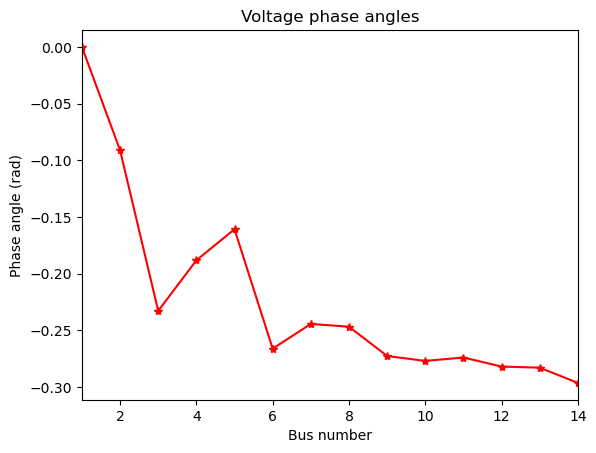

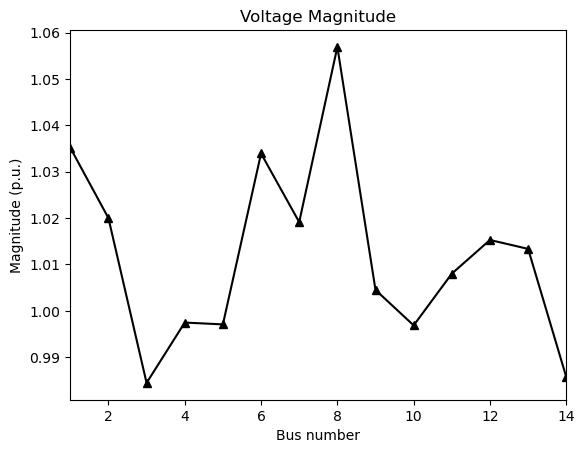

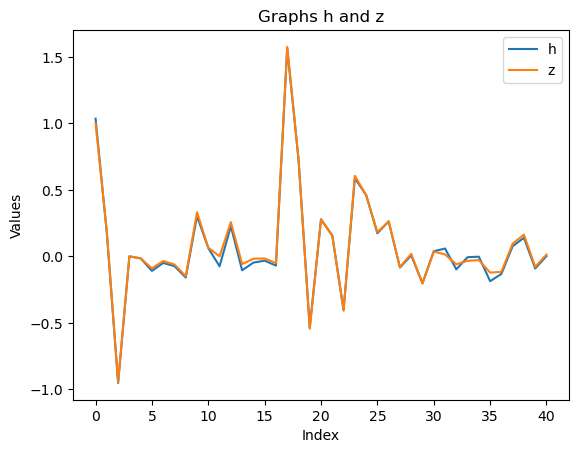

 repetition ------------->>>>>>>>>>>>>>>>> 46
state 

 [1.03512544 1.01993803 0.98437522 0.99740029 0.99700372 1.03389793
 1.01905279 1.05676841 1.00444976 0.99680203 1.007967   1.01523429
 1.01330827 0.98565727]


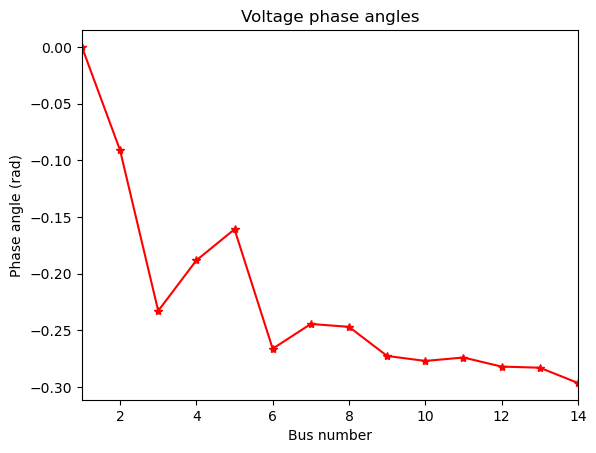

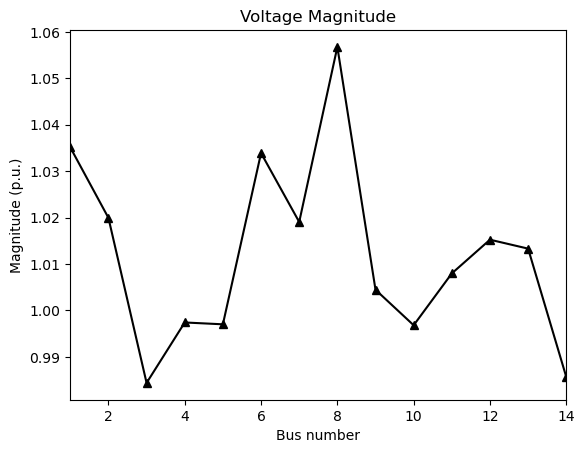

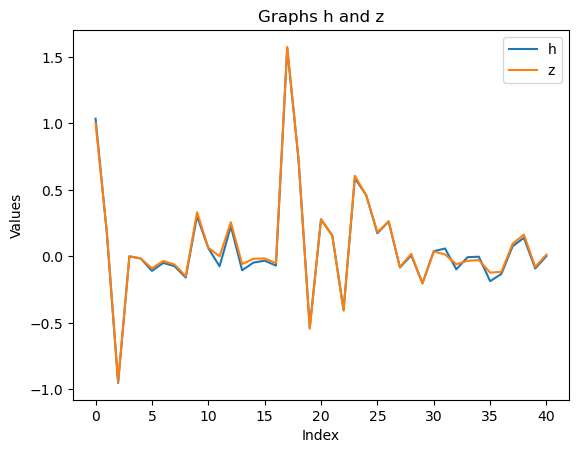

 repetition ------------->>>>>>>>>>>>>>>>> 47
state 

 [1.03506657 1.01987978 0.98431789 0.99734221 0.99694603 1.03385552
 1.01896858 1.05659891 1.00440434 0.99675788 1.00792449 1.01519112
 1.01326363 0.98561137]


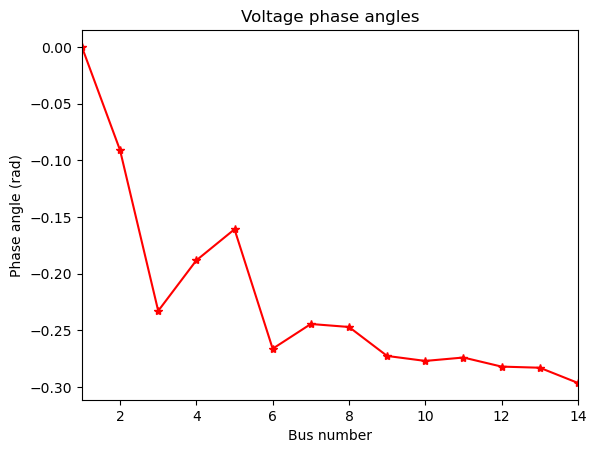

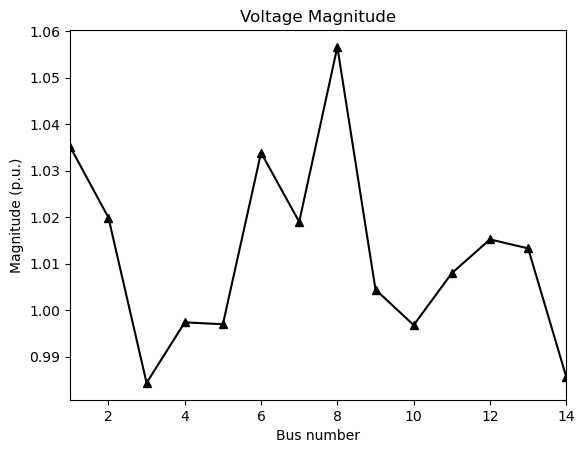

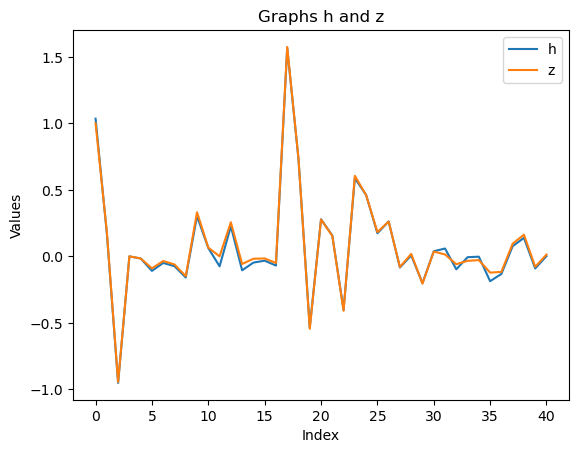

 repetition ------------->>>>>>>>>>>>>>>>> 48
state 

 [1.03500925 1.0198243  0.98426366 0.997288   0.99689233 1.03381754
 1.01888735 1.05642878 1.00436375 0.99671869 1.00788679 1.01515239
 1.01322296 0.98557067]


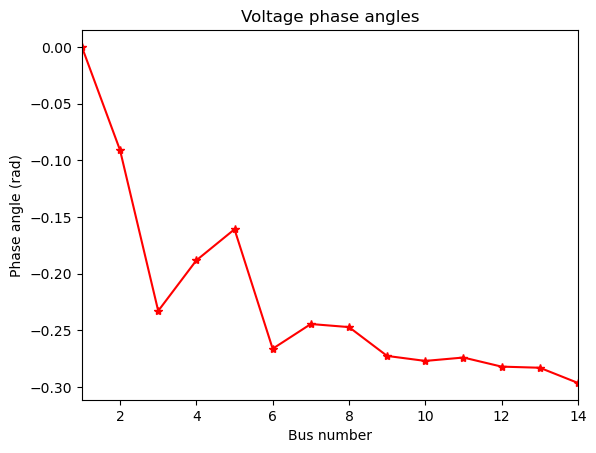

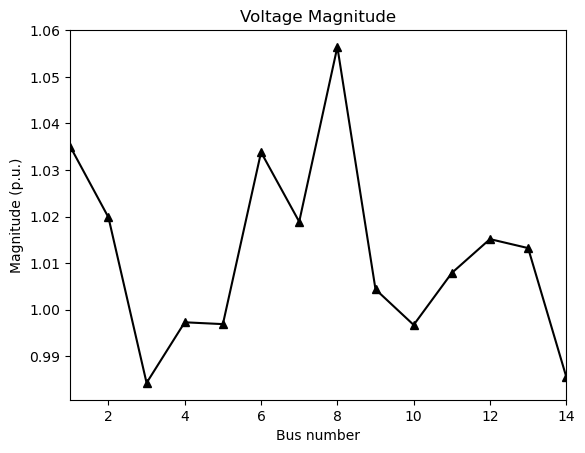

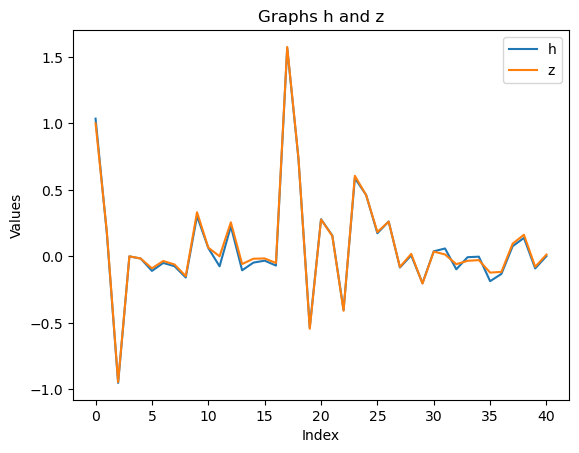

 repetition ------------->>>>>>>>>>>>>>>>> 49
state 

 [1.03495941 1.01977474 0.98421491 0.99723865 0.99684287 1.03378504
 1.01880958 1.05625903 1.00432756 0.99668384 1.00785389 1.01511904
 1.01318791 0.98553439]


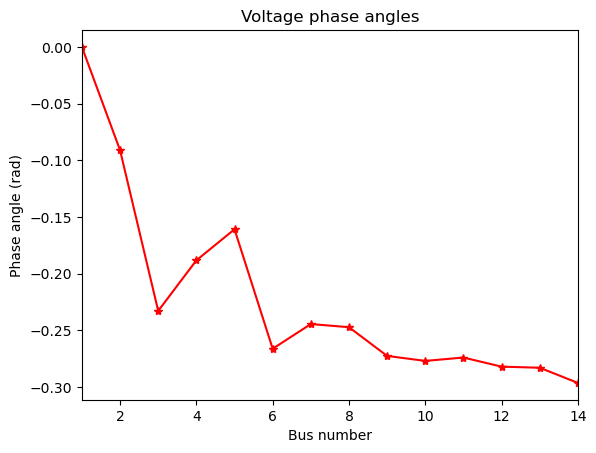

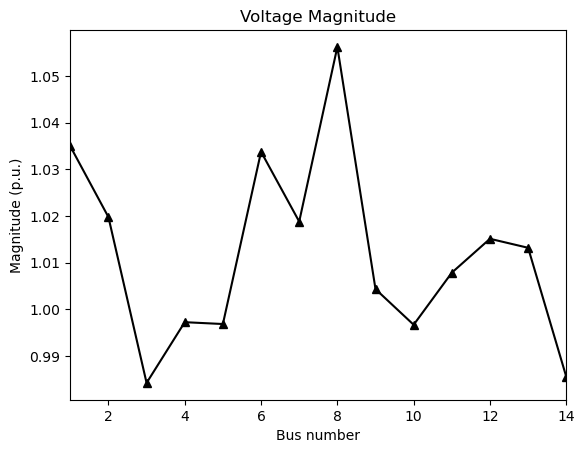

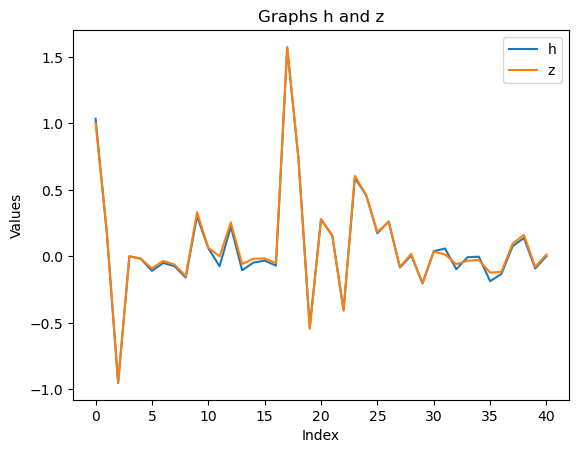

In [9]:
Pi= pd.read_csv("Zdata_small.csv")
nbus=14;
Pi= Pi.to_numpy();
num=14

dim_x = 27 # state dimension
dim_z = 41 # measurement dimension
def fx(x, dt):
    F = np.identity(27)
    return np.dot(F, x)



points = MerweScaledSigmaPoints(n=dim_x, alpha=0.1, beta=2.0, kappa=-1.0)

#need to improve on the values of alpha beta kappa for better results of z-h rest is good
#now z-h is good but alpha beta kappa can be improved



kf = UnscentedKalmanFilter(dim_x=dim_x, dim_z=dim_z, dt=0.1, fx=fx, hx=Hx, points=points)
initial_state = np.zeros(27)  # Initial state vector
for i in range(13,27):
    initial_state[i]=1
kf.x=initial_state

kf.P = np.eye(dim_x) * 0.1 # initial state covariance matrix
kf.Q = np.eye(dim_x) * 0.01 # process noise covariance matrix
kf.R = np.eye(dim_z) * 0.1 # measurement noise covariance matrix

for i in range (0,50):
    
    zdata = zdatas(i)
    z1 = zdata[:,2]
    z= np.zeros(41)
    for i1 in range (41):
        z[i1]=z1[i1]
    kf.predict() # predict step
    kf.update(z) # update step
    h1=Hx(kf.x)

     # ++++++++++++++++++++++
    # Presenting the results
    # ===================
    del2 = np.zeros(14);
    del2[1:]=kf.x[0:13]
    print(" repetition ------------->>>>>>>>>>>>>>>>>",i)
    print("state \n\n",kf.x[13:])


    plot.figure()
    plot.plot(range(1,nbus+1),del2,'-r*')
    plot.title('Voltage phase angles')
    plot.xlabel('Bus number')
    plot.ylabel('Phase angle (rad)')
    plot.xlim(1,nbus)

    plot.figure()
    plot.plot(range(1,nbus+1),kf.x[13:],'-k^')
    plot.title('Voltage Magnitude')
    plot.xlabel('Bus number')
    plot.ylabel('Magnitude (p.u.)')
    plot.xlim(1,nbus)
    plot.show()

    fig, ax = plot.subplots()
    ax.plot(h1, label='h')
    ax.plot(z, label='z')
    ax.set_title('Graphs h and z')             # Set the plot title and labels
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.legend()                                # Add a legend
    plot.show()                                # Display the plot

    # ++++++++++++++++++++++
    # end of the results
    # ===================




In [10]:
for i in range (0,2):
    zdata = zdatas(i)
    z1 = zdata[:,2]
    z= np.zeros(41)
    for i1 in range (41):
        z[i1]=z1[i1]
    
    # z = np.reshape(z, -1) 
    print(z.shape)

(41,)
(41,)
